In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix

from sklearn import metrics
from sklearn.cluster import KMeans

from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns

In [2]:
! pip install nltk

In [3]:
import nltk

In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# Importation de la base de données

In [5]:
data = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')
data

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

In [6]:
!pip install requests

In [7]:
import requests
requests.get('http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z/55b85ea15a1536d46b7190ad6fff8ce7.jpg', allow_redirects=True)

<Response [200]>

## Création des catégories (7)

In [8]:
data["product_category_1"] = data["product_category_tree"].apply(lambda char : char.split('[')[1].split('"')[1].split(" >> ")[0])

## Création des deuxièmes catégories

In [9]:
data["product_category_2"] = data["product_category_tree"].apply(lambda char : char.split('[')[1].split('"')[1].split(" >> ")[1])

## Union des noms des produits et de leur description dans une nouvelle variable

In [10]:
data["description_and_name"] = data["product_name"]+" "+data["description"]

In [11]:
data.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications product_category_1  \
0  {"product_specification"=>[{"key"=>"Brand", "v...    Home Furnishing   
1  {"product_specification"=>[{"key"=>"Machine Wa...          Baby Care   
2  {"product_specification"=>[{"key"=>"Material",...          Baby Care   
3  {"product_specification"=>[{"key"=>"Brand", "v...    Home Furnishing   
4  {"product_specification"=>[{"key"=>"Machine Wa...    Home Furnishing   

       product_category_2                               description_and_name  
0  Curtains & Accessories  Elegance Polyester Multicolor Abstract Eyelet ...  
1        Baby Bath & Skin  Sathiyas Cotton Bath Towel Specifications of S...  
2        Baby Bath & Skin  Eurospa Cotton Terry Face Towel Set Key Featur...  
3               Bed Linen  SANTOSH ROYAL FASHION Cotton Printed King size...  
4               Bed Linen  Jaipur Print Cotton Floral King sized Double B...

# Répartition des produits par catégorie

## Premières catégories (7)

In [12]:
def pie_chart(data, catagorie, titre):
    d = {"Nombre d'articles": data[catagorie],
     'Compte': np.array([1 for i in range(len(data))])}
    df = pd.DataFrame(data=d)

    df = df.groupby("Nombre d'articles")["Compte"].sum()
    
#     titre = "Répartition des articles par catégorie (%s)" %len(data[catagorie].unique())

    %matplotlib inline
    sns.set_theme(style="whitegrid")
    pie, ax = plt.subplots(figsize=[16, 10])
    labels = df.keys()
    plt.pie(x=df, autopct="%.1f%%",
            explode=[0.05]*len(data[catagorie].unique()),
            labels=labels,
            pctdistance=0.5)
    plt.title(titre, fontsize=14)

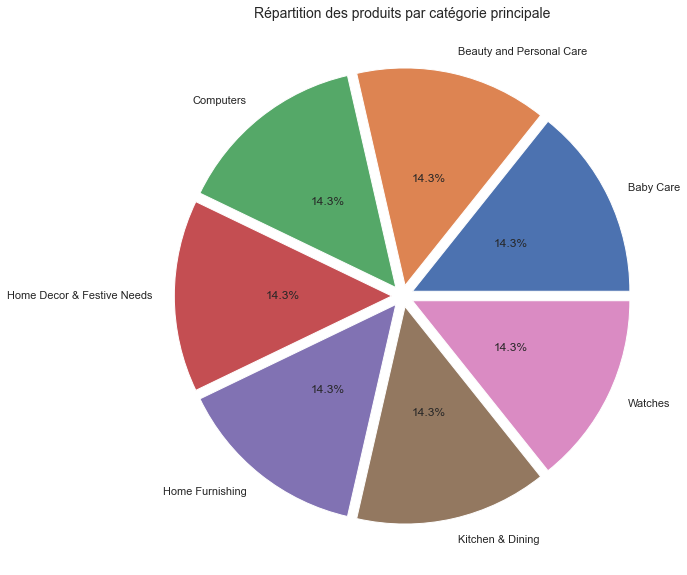

In [13]:
pie_chart(data, "product_category_1", "Répartition des produits par catégorie principale")

## Deuxième catégories (62)

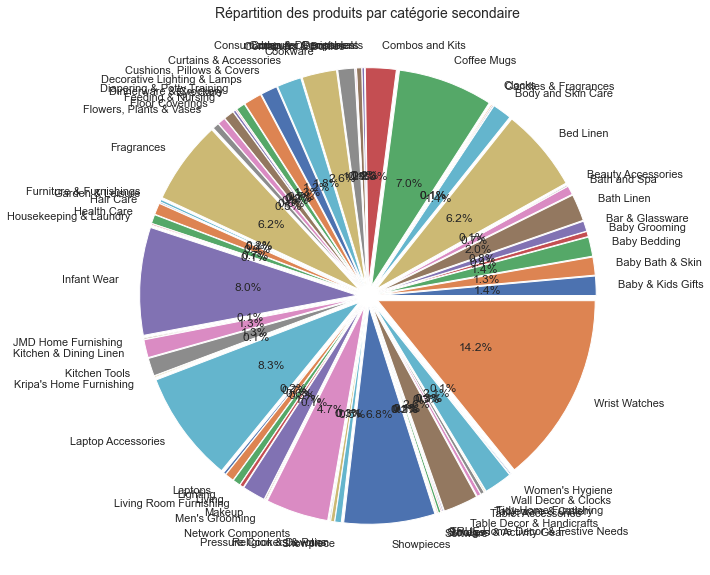

In [14]:
pie_chart(data, "product_category_2", "Répartition des produits par catégorie secondaire")

# Analyse des mots les plus fréquents

## Déroulement du processus sur l'ensemble des produits

In [15]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
stopwords=set(stopwords.words('english'))

text=".".join(data["description"]).lower()


from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
words=tokenizer.tokenize(text)

wordsFiltered=[]

for w in words:
    if w not in stopwords:
        wordsFiltered.append(w)
    
Total = list(pd.Series(wordsFiltered).apply(lambda words : lemmatizer.lemmatize(words)))

Total

['key',
 'feature',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 '213',
 'cm',
 'height',
 'pack',
 '2',
 'price',
 'r',
 '899',
 'curtain',
 'enhances',
 'look',
 'interior',
 'curtain',
 'made',
 '100',
 'high',
 'quality',
 'polyester',
 'fabric',
 'feature',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environment',
 'romantic',
 'loving',
 'curtain',
 'ant',
 'wrinkle',
 'anti',
 'shrinkage',
 'elegant',
 'apparance',
 'give',
 'home',
 'bright',
 'modernistic',
 'appeal',
 'design',
 'surreal',
 'attention',
 'sure',
 'steal',
 'heart',
 'contemporary',
 'eyelet',
 'valance',
 'curtain',
 'slide',
 'smoothly',
 'draw',
 'apart',
 'first',
 'thing',
 'morning',
 'welcome',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morning',
 'whole',
 'world',
 'draw',
 'close',
 'evening',
 'create',
 'spec

In [16]:
data.loc[0,"description"]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [17]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
stopwords=set(stopwords.words('english'))

text=data.loc[0,"description"].lower()

In [18]:
text

'key features of elegance polyester multicolor abstract eyelet door curtain floral curtain,elegance polyester multicolor abstract eyelet door curtain (213 cm in height, pack of 2) price: rs. 899 this curtain enhances the look of the interiors.this curtain is made from 100% high quality polyester fabric.it features an eyelet style stitch with metal ring.it makes the room environment romantic and loving.this curtain is ant- wrinkle and anti shrinkage and have elegant apparance.give your home a bright and modernistic appeal with these designs. the surreal attention is sure to steal hearts. these contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. bring home the elegant curtain that softly filters light in your room so that you

In [19]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
words=tokenizer.tokenize(text)

words

['key',
 'features',
 'of',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 '213',
 'cm',
 'in',
 'height',
 'pack',
 'of',
 '2',
 'price',
 'rs',
 '899',
 'this',
 'curtain',
 'enhances',
 'the',
 'look',
 'of',
 'the',
 'interiors',
 'this',
 'curtain',
 'is',
 'made',
 'from',
 '100',
 'high',
 'quality',
 'polyester',
 'fabric',
 'it',
 'features',
 'an',
 'eyelet',
 'style',
 'stitch',
 'with',
 'metal',
 'ring',
 'it',
 'makes',
 'the',
 'room',
 'environment',
 'romantic',
 'and',
 'loving',
 'this',
 'curtain',
 'is',
 'ant',
 'wrinkle',
 'and',
 'anti',
 'shrinkage',
 'and',
 'have',
 'elegant',
 'apparance',
 'give',
 'your',
 'home',
 'a',
 'bright',
 'and',
 'modernistic',
 'appeal',
 'with',
 'these',
 'designs',
 'the',
 'surreal',
 'attention',
 'is',
 'sure',
 'to',
 'steal',
 'hearts',
 'these',
 'contemporary',
 'eyelet'

In [20]:
wordsFiltered=[]

for w in words:
    if w not in stopwords:
        wordsFiltered.append(w)
        
wordsFiltered

['key',
 'features',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 '213',
 'cm',
 'height',
 'pack',
 '2',
 'price',
 'rs',
 '899',
 'curtain',
 'enhances',
 'look',
 'interiors',
 'curtain',
 'made',
 '100',
 'high',
 'quality',
 'polyester',
 'fabric',
 'features',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'makes',
 'room',
 'environment',
 'romantic',
 'loving',
 'curtain',
 'ant',
 'wrinkle',
 'anti',
 'shrinkage',
 'elegant',
 'apparance',
 'give',
 'home',
 'bright',
 'modernistic',
 'appeal',
 'designs',
 'surreal',
 'attention',
 'sure',
 'steal',
 'hearts',
 'contemporary',
 'eyelet',
 'valance',
 'curtains',
 'slide',
 'smoothly',
 'draw',
 'apart',
 'first',
 'thing',
 'morning',
 'welcome',
 'bright',
 'sun',
 'rays',
 'want',
 'wish',
 'good',
 'morning',
 'whole',
 'world',
 'draw',
 'close',
 'evening',
 'create

In [21]:
Total = list(pd.Series(wordsFiltered).apply(lambda words : lemmatizer.lemmatize(words)))

Total

['key',
 'feature',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 '213',
 'cm',
 'height',
 'pack',
 '2',
 'price',
 'r',
 '899',
 'curtain',
 'enhances',
 'look',
 'interior',
 'curtain',
 'made',
 '100',
 'high',
 'quality',
 'polyester',
 'fabric',
 'feature',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environment',
 'romantic',
 'loving',
 'curtain',
 'ant',
 'wrinkle',
 'anti',
 'shrinkage',
 'elegant',
 'apparance',
 'give',
 'home',
 'bright',
 'modernistic',
 'appeal',
 'design',
 'surreal',
 'attention',
 'sure',
 'steal',
 'heart',
 'contemporary',
 'eyelet',
 'valance',
 'curtain',
 'slide',
 'smoothly',
 'draw',
 'apart',
 'first',
 'thing',
 'morning',
 'welcome',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morning',
 'whole',
 'world',
 'draw',
 'close',
 'evening',
 'create',
 'spec

## Par catégorie

In [22]:
Data2 = pd.DataFrame(data.groupby("product_category_1", as_index=False).agg({"description":".".join}))

In [23]:
Data2

product_category_1  \
0                   Baby Care   
1    Beauty and Personal Care   
2                   Computers   
3  Home Decor & Festive Needs   
4             Home Furnishing   
5            Kitchen & Dining   
6                     Watches   

                                         description  
0  Specifications of Sathiyas Cotton Bath Towel (...  
1  Key Features of Burt s Bees Hair Repair Shea A...  
2  Key Features of D-Link DAP1320 QRS app(iOS,And...  
3  Myesquire Ceramic Burner Pot Lemongrass Liquid...  
4  Key Features of Elegance Polyester Multicolor ...  
5  Key Features of Dungri India Craft Ducjug010-d...  
6  Maserati Time R8851116001 Analog Watch  - For ...

In [24]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import seaborn as sns
import matplotlib.pyplot as plt

def Traiter_les_Mots(text,categorie):
    
    stopwords2=set(stopwords.words('english'))
    lemmatizer=WordNetLemmatizer()
    tokenizer = RegexpTokenizer(r'\w+')

    text = text.lower()
    
    words=tokenizer.tokenize(text)
    
    wordsFiltered=[]

    for w in words:
        if w not in stopwords2:
            wordsFiltered.append(w)
    
    Total = list(pd.Series(wordsFiltered).apply(lambda words : lemmatizer.lemmatize(words)))
    
    fd = nltk.FreqDist(Total)
    
    table = pd.DataFrame(fd.most_common(20))
    table.rename(columns = {0:'Word',1:'Freq'}, inplace = True)

    sns.set_theme(style="whitegrid")

    ax = plt.subplots(figsize=(20, 8))

    sns.barplot(x="Freq", y="Word", data=table,
            label="Total", color="b").set(title=categorie)

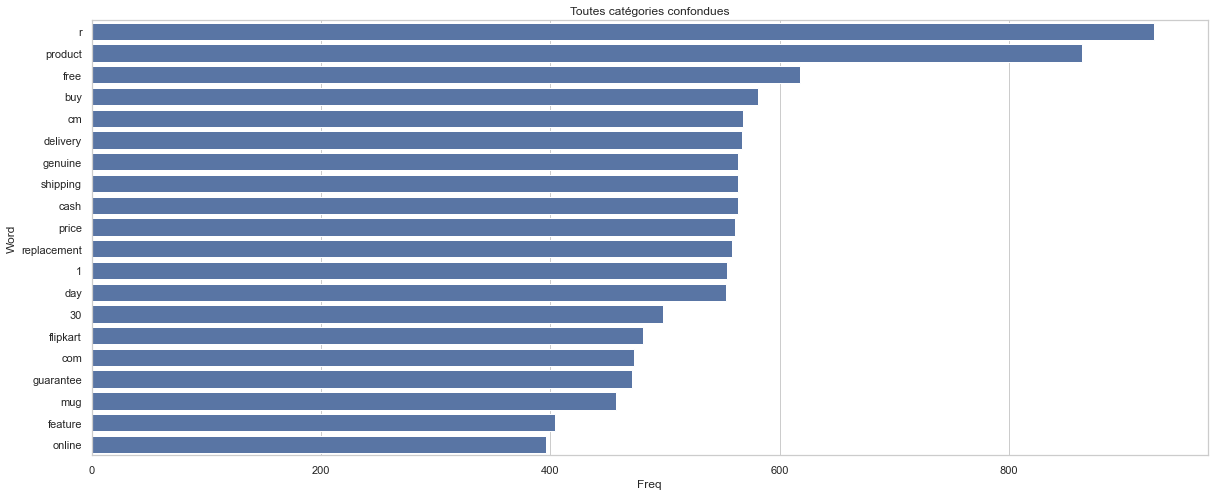

In [25]:
Traiter_les_Mots(".".join(data["description"]),"Toutes catégories confondues")

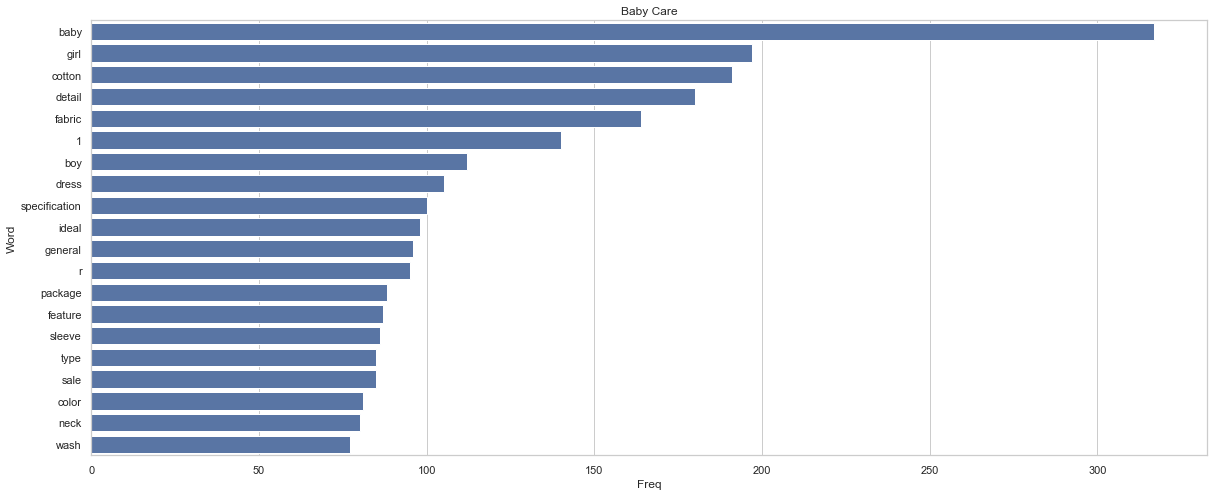

In [26]:
Traiter_les_Mots(Data2.loc[Data2["product_category_1"] == "Baby Care","description"][0],"Baby Care")

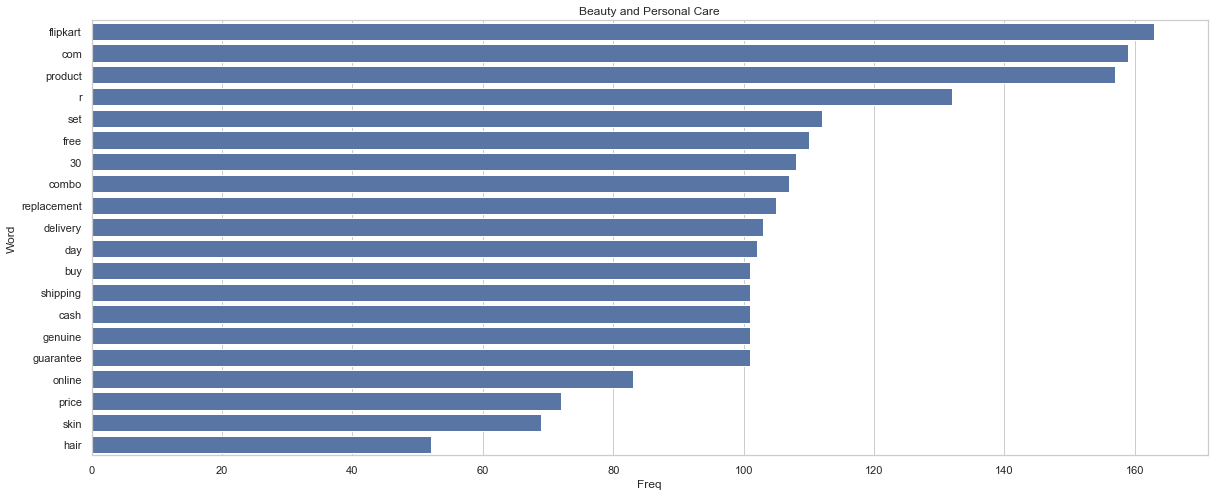

In [27]:
Traiter_les_Mots(Data2.loc[Data2["product_category_1"] == "Beauty and Personal Care","description"][1],"Beauty and Personal Care")

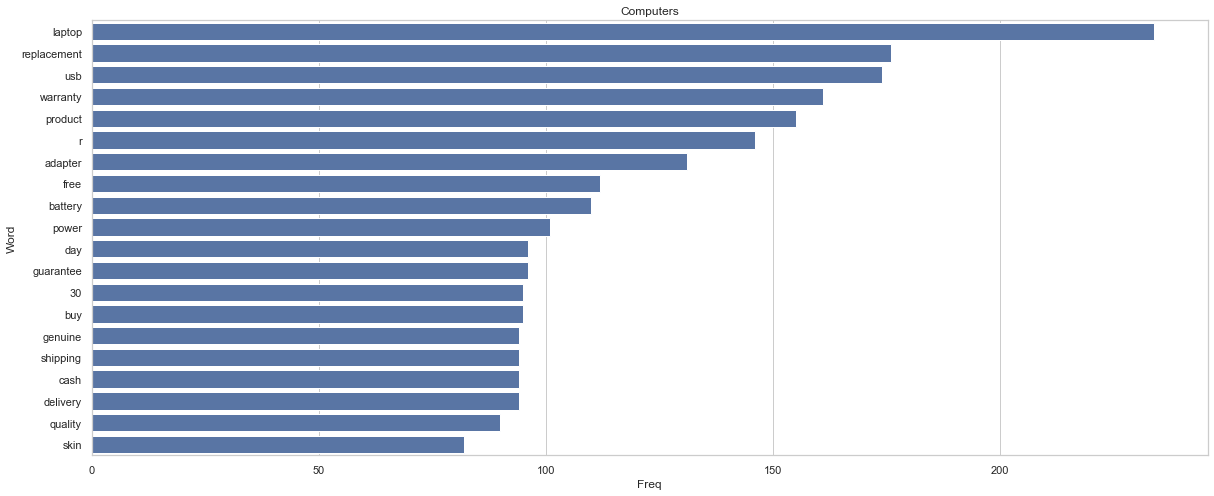

In [28]:
Traiter_les_Mots(Data2.loc[Data2["product_category_1"] == "Computers","description"][2],"Computers")

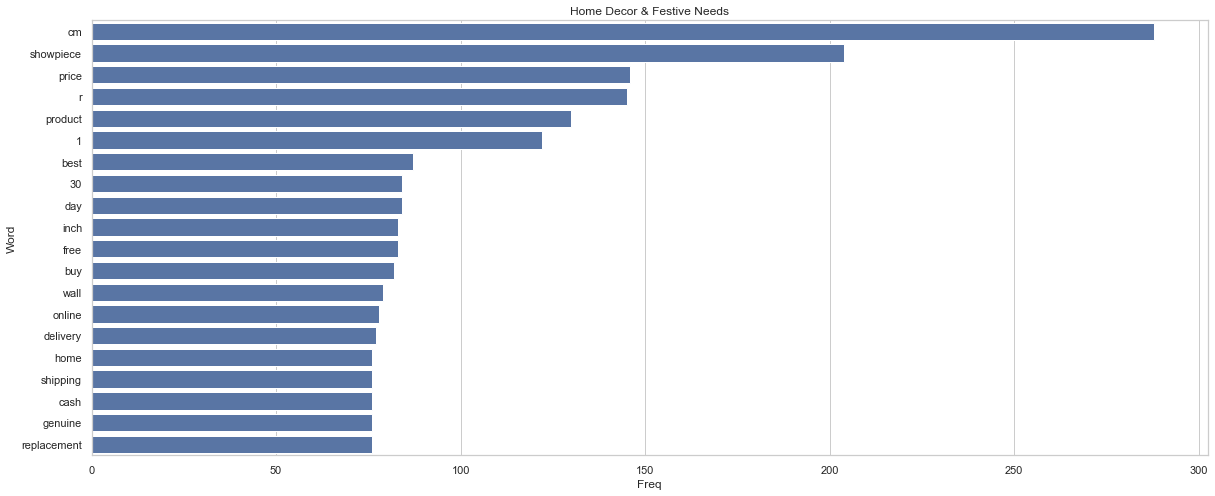

In [29]:
Traiter_les_Mots(Data2.loc[Data2["product_category_1"] == "Home Decor & Festive Needs","description"][3],"Home Decor & Festive Needs")

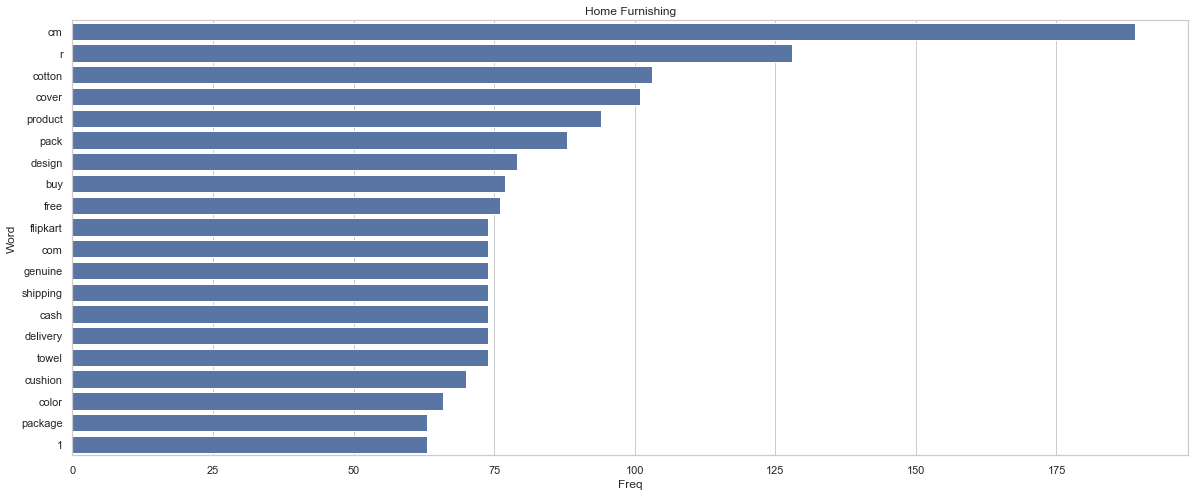

In [30]:
Traiter_les_Mots(Data2.loc[Data2["product_category_1"] == "Home Furnishing","description"][4],"Home Furnishing")

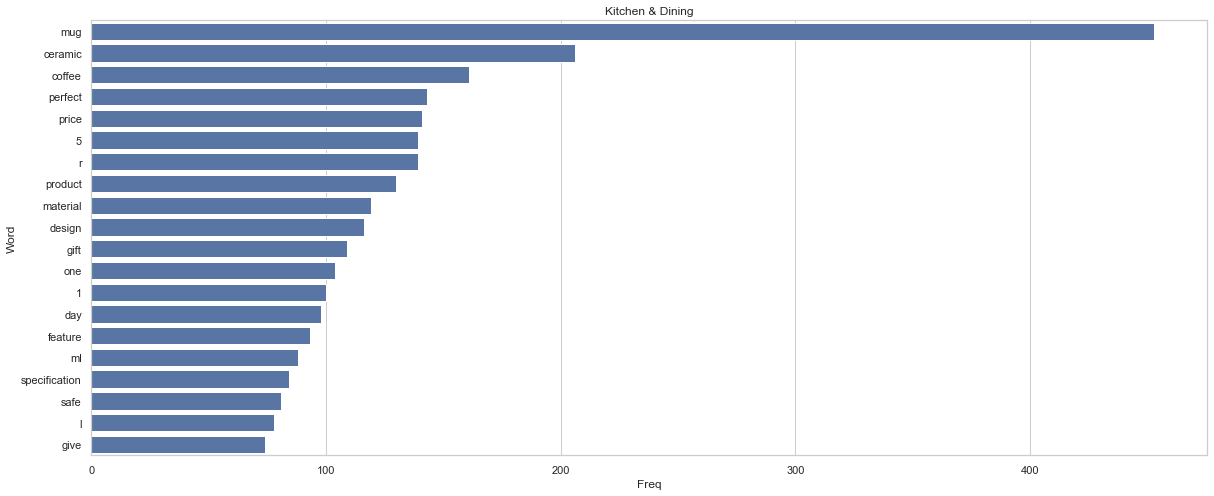

In [31]:
Traiter_les_Mots(Data2.loc[Data2["product_category_1"] == "Kitchen & Dining","description"][5],"Kitchen & Dining")

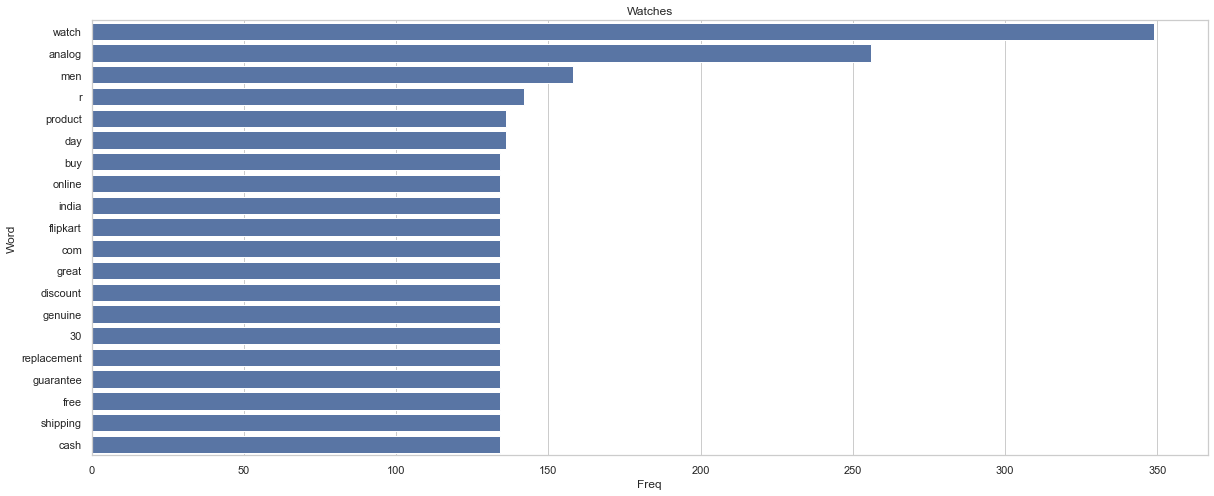

In [32]:
Traiter_les_Mots(Data2.loc[Data2["product_category_1"] == "Watches","description"][6],"Watches")

## Analyse bi-grams

In [33]:
from nltk import bigrams

In [34]:
def Traiter_les_Bigrams(text,categorie):
    
    stopwords3=set(stopwords.words('english'))
    lemmatizer=WordNetLemmatizer()
    tokenizer = RegexpTokenizer(r'\w+')

    text = text.lower()
    
    words=tokenizer.tokenize(text)
    
    wordsFiltered=[]

    for w in words:
        if w not in stopwords3:
            wordsFiltered.append(w)
    
    Total = list(pd.Series(wordsFiltered).apply(lambda words : lemmatizer.lemmatize(words)))
    
    bi_total = bigrams(Total)
    
    fd = nltk.FreqDist(bi_total)
    
    table = pd.DataFrame(fd.most_common(20))
    table.rename(columns = {0:'Bi-Grams',1:'Freq'}, inplace = True)
    
    sns.set_theme(style="whitegrid")

    ax = plt.subplots(figsize=(20, 8))

    sns.barplot(x="Freq", y="Bi-Grams", data=table,
            label="Total", color="b").set(title=categorie)

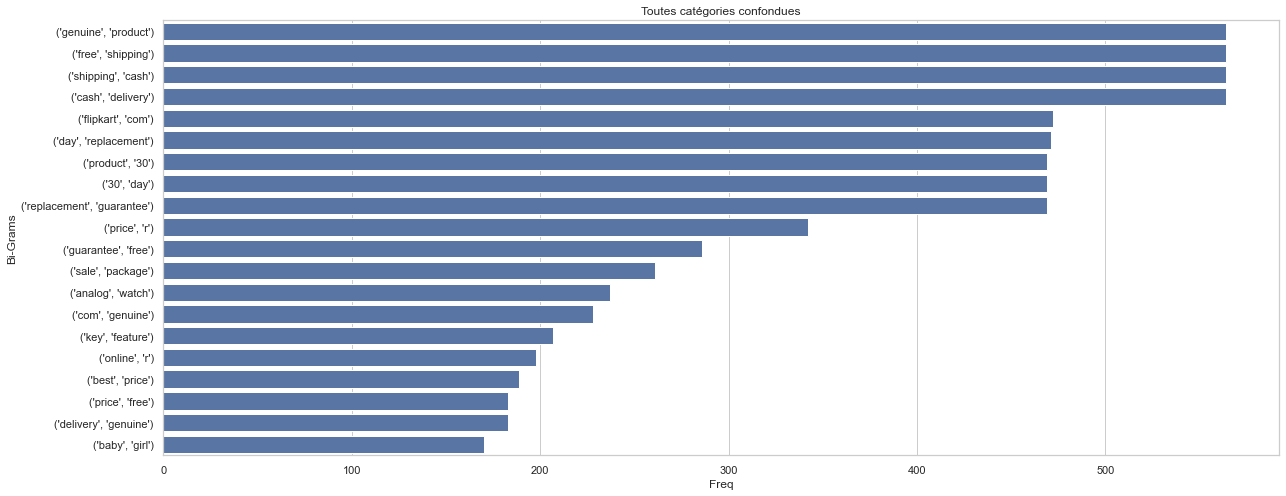

In [35]:
Traiter_les_Bigrams(".".join(data["description"]),"Toutes catégories confondues")

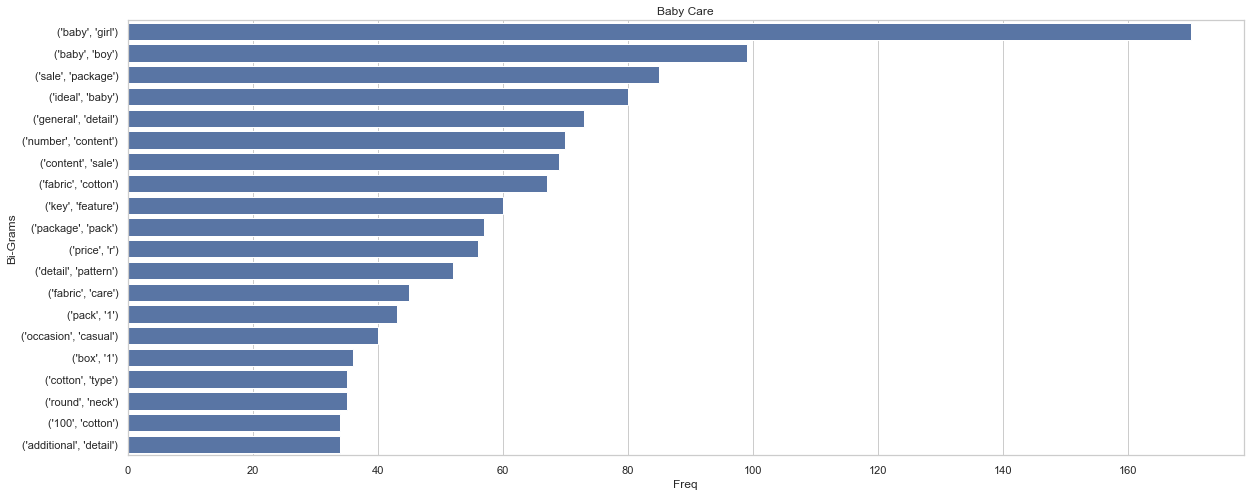

In [36]:
Traiter_les_Bigrams(Data2.loc[Data2["product_category_1"] == "Baby Care","description"][0],"Baby Care")

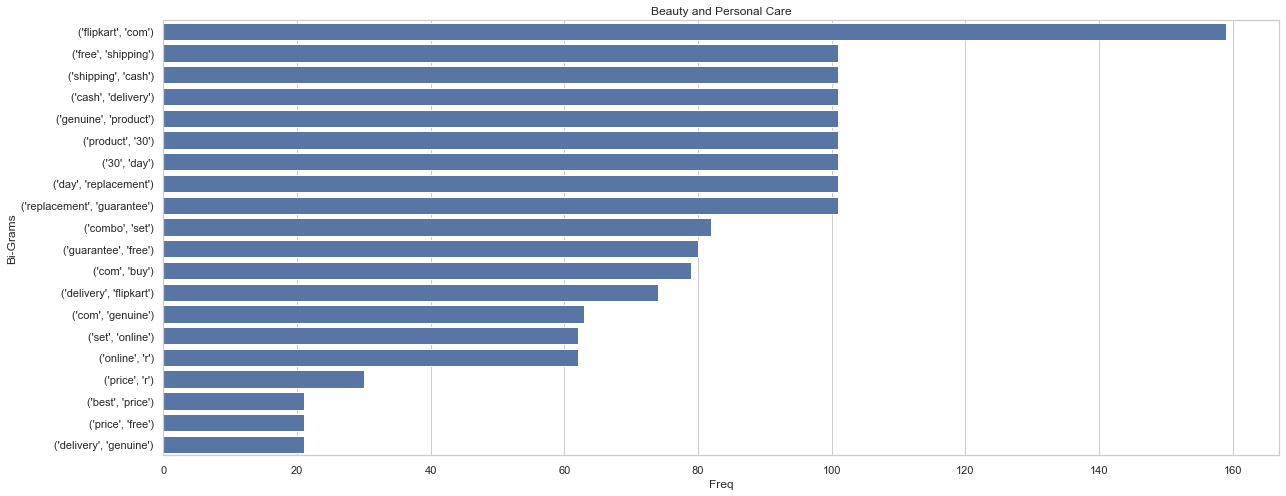

In [37]:
Traiter_les_Bigrams(Data2.loc[Data2["product_category_1"] == "Beauty and Personal Care","description"][1],"Beauty and Personal Care")

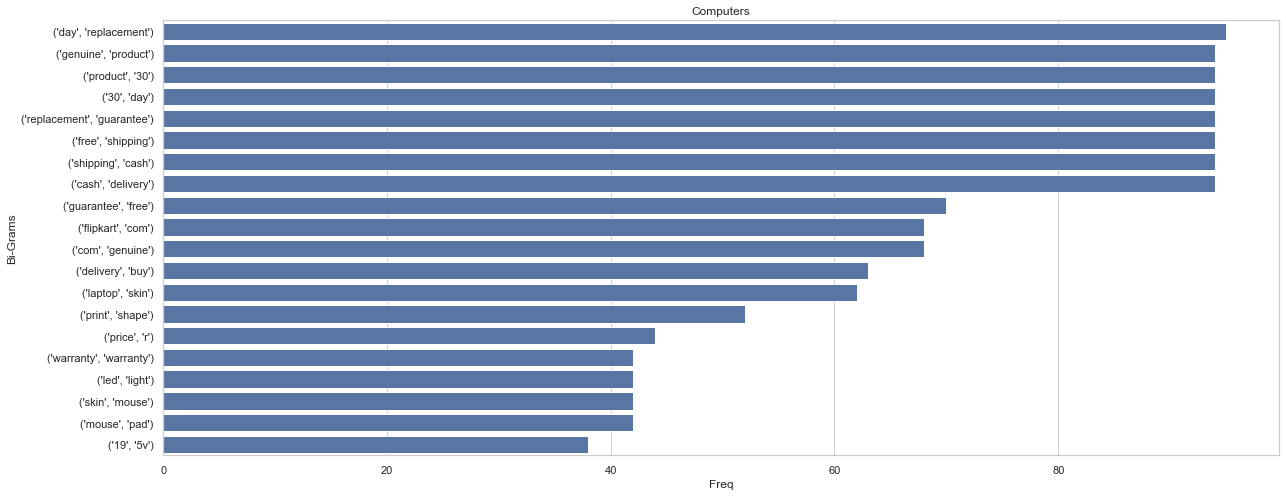

In [38]:
Traiter_les_Bigrams(Data2.loc[Data2["product_category_1"] == "Computers","description"][2],"Computers")

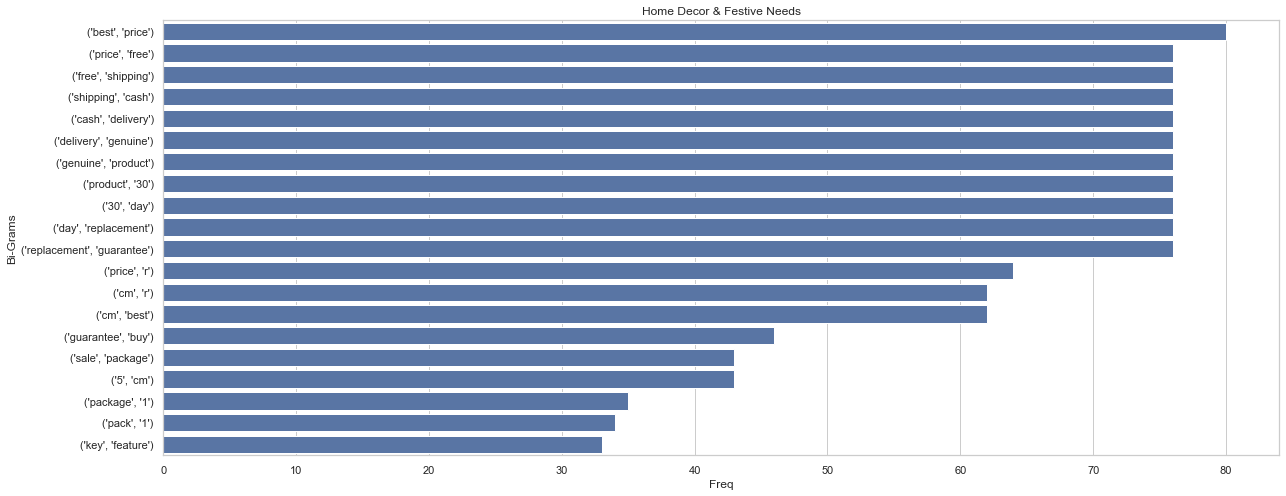

In [39]:
Traiter_les_Bigrams(Data2.loc[Data2["product_category_1"] == "Home Decor & Festive Needs","description"][3],"Home Decor & Festive Needs")

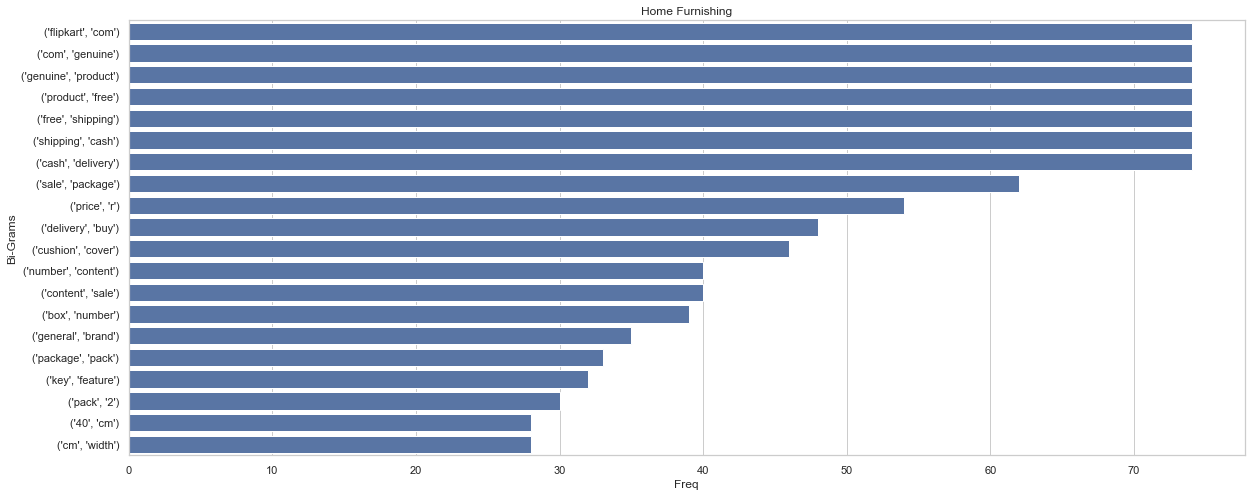

In [40]:
Traiter_les_Bigrams(Data2.loc[Data2["product_category_1"] == "Home Furnishing","description"][4],"Home Furnishing")

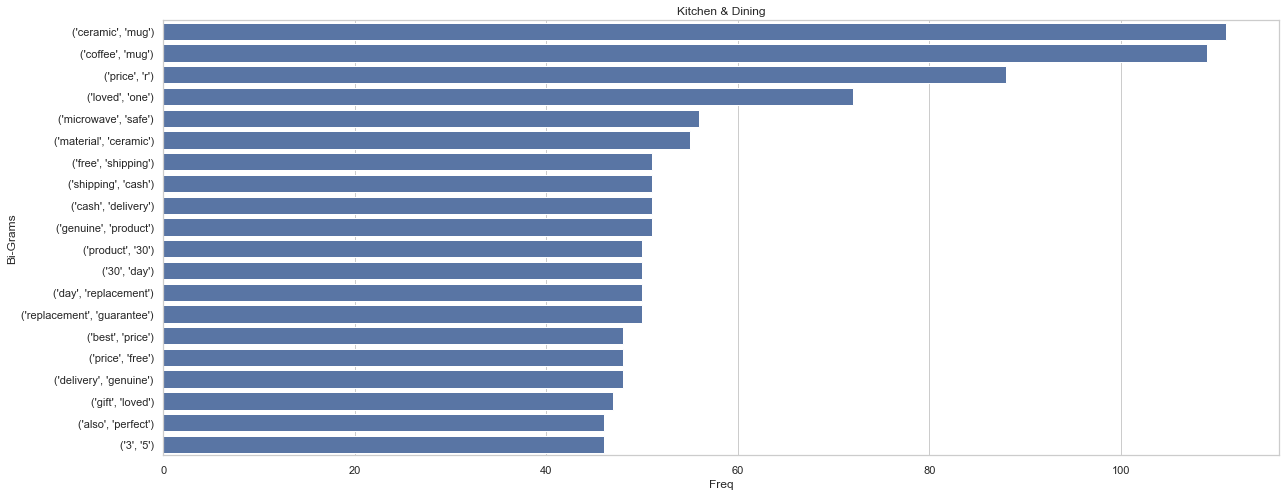

In [41]:
Traiter_les_Bigrams(Data2.loc[Data2["product_category_1"] == "Kitchen & Dining","description"][5],"Kitchen & Dining")

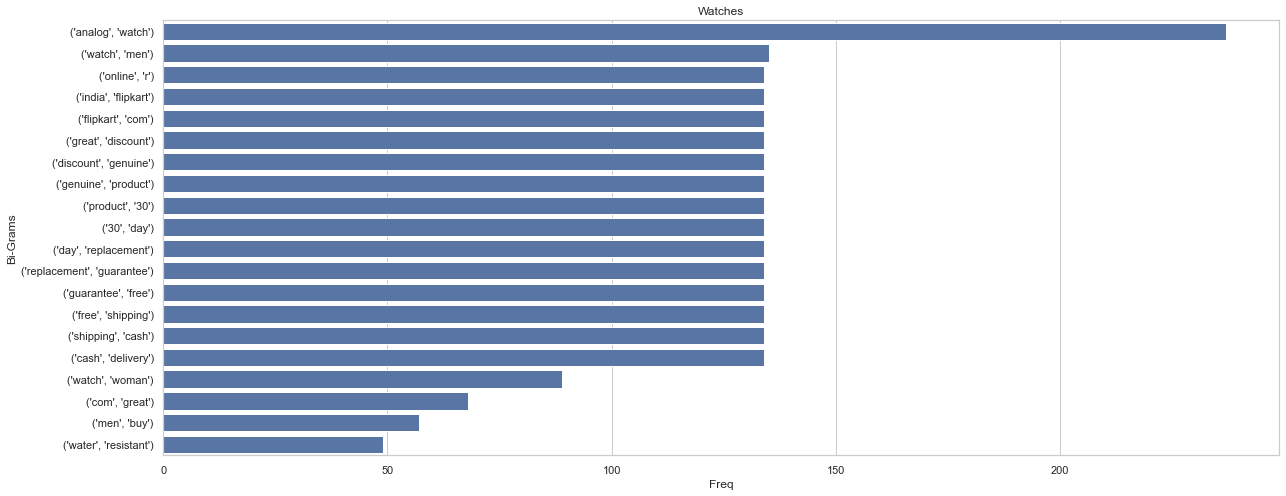

In [42]:
Traiter_les_Bigrams(Data2.loc[Data2["product_category_1"] == "Watches","description"][6],"Watches")

In [43]:
from nltk.corpus import stopwords

def Traiter_les_Mots_Total_Categories(text):
    
    stopwords4=set(stopwords.words('english'))
    lemmatizer=WordNetLemmatizer()
    tokenizer = RegexpTokenizer(r'\w+')

    text = text.lower()
    
    words=tokenizer.tokenize(text)
    
    wordsFiltered=[]

    for w in words:
        if w not in stopwords4:
            wordsFiltered.append(w)
    
    Total = list(pd.Series(wordsFiltered).apply(lambda words : lemmatizer.lemmatize(words)))
    
    fd = nltk.FreqDist(Total)
    
    return fd

In [44]:
freq_Total = Traiter_les_Mots_Total_Categories(".".join(data["description"]))
freq_Baby_Care = Traiter_les_Mots_Total_Categories(Data2.loc[Data2["product_category_1"] == "Baby Care","description"][0])
freq_Beauty_Personal_Care = Traiter_les_Mots_Total_Categories(Data2.loc[Data2["product_category_1"] == "Beauty and Personal Care","description"][1])
freq_Computers = Traiter_les_Mots_Total_Categories(Data2.loc[Data2["product_category_1"] == "Computers","description"][2])
freq_Home_Decor_Festive_Needs = Traiter_les_Mots_Total_Categories(Data2.loc[Data2["product_category_1"] == "Home Decor & Festive Needs","description"][3])
freq_Home_Furnishing = Traiter_les_Mots_Total_Categories(Data2.loc[Data2["product_category_1"] == "Home Furnishing","description"][4])
freq_Kitchen_Dining = Traiter_les_Mots_Total_Categories(Data2.loc[Data2["product_category_1"] == "Kitchen & Dining","description"][5])
freq_Watches = Traiter_les_Mots_Total_Categories(Data2.loc[Data2["product_category_1"] == "Watches","description"][6])

In [45]:
Word = []
Total = []
Baby_Care = []
Beauty_Personal_Care = []
Computers = []
Home_Decor_Festive_Needs = []
Home_Furnishing = []
Kitchen_Dining = []
Watches = []



for i in freq_Total.most_common(20):
    Word.extend([i[0]])
    Total.append(freq_Total[i[0]])
    Baby_Care.append(freq_Baby_Care[i[0]])
    Beauty_Personal_Care.append(freq_Beauty_Personal_Care[i[0]])
    Computers.append(freq_Computers[i[0]])
    Home_Decor_Festive_Needs.append(freq_Home_Decor_Festive_Needs[i[0]])
    Home_Furnishing.append(freq_Home_Furnishing[i[0]])
    Kitchen_Dining.append(freq_Kitchen_Dining[i[0]])
    Watches.append(freq_Watches[i[0]])

In [46]:
df = pd.DataFrame({'Words': Word,
                   'Baby Care': Baby_Care,
                   'Beauty and Personal Care': Beauty_Personal_Care,
                   'Computers': Computers,
                   'Home Decor & Festive Needs': Home_Decor_Festive_Needs,
                   'Home Furnishing': Home_Furnishing,
                   'Kitchen & Dining': Kitchen_Dining,
                   'Watches': Watches})

<AxesSubplot:xlabel='Words'>

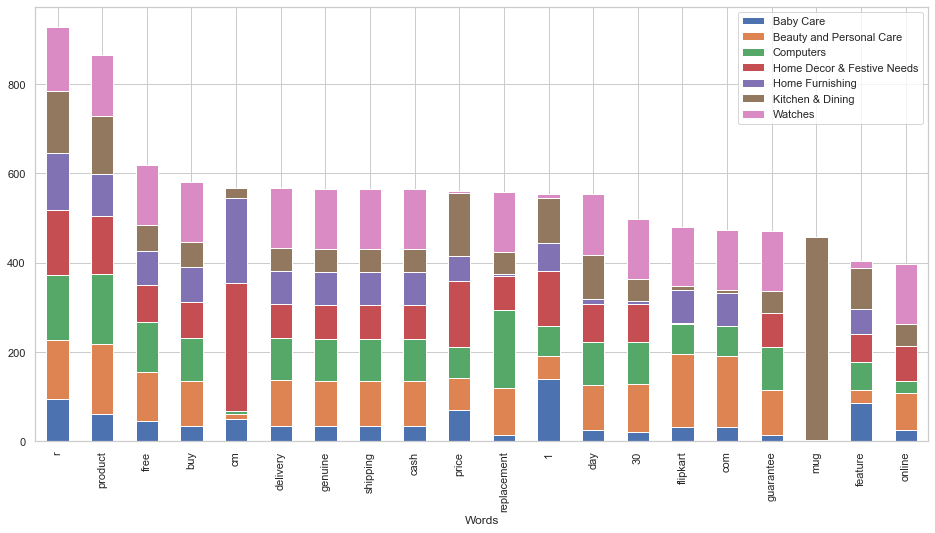

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set_theme(style="whitegrid")

#create stacked bar chart
df.set_index('Words').plot(kind='bar', stacked=True, figsize=(16, 8))

In [48]:
Words = []
Baby_Care = []
Beauty_Personal_Care = []
Computers = []
Home_Decor_Festive_Needs = []
Home_Furnishing = []
Kitchen_Dining = []
Watches = []

for i in freq_Baby_Care.most_common(3):
    Words.append(i[0])
    Baby_Care.append(freq_Baby_Care[i[0]])
    Beauty_Personal_Care.append(freq_Beauty_Personal_Care[i[0]])
    Computers.append(freq_Computers[i[0]])
    Home_Decor_Festive_Needs.append(freq_Home_Decor_Festive_Needs[i[0]])
    Home_Furnishing.append(freq_Home_Furnishing[i[0]])
    Kitchen_Dining.append(freq_Kitchen_Dining[i[0]])
    Watches.append(freq_Watches[i[0]])
    
for i in freq_Beauty_Personal_Care.most_common(3):
    Words.append(i[0])
    Baby_Care.append(freq_Baby_Care[i[0]])
    Beauty_Personal_Care.append(freq_Beauty_Personal_Care[i[0]])
    Computers.append(freq_Computers[i[0]])
    Home_Decor_Festive_Needs.append(freq_Home_Decor_Festive_Needs[i[0]])
    Home_Furnishing.append(freq_Home_Furnishing[i[0]])
    Kitchen_Dining.append(freq_Kitchen_Dining[i[0]])
    Watches.append(freq_Watches[i[0]])
    
for i in freq_Computers.most_common(3):
    Words.append(i[0])
    Baby_Care.append(freq_Baby_Care[i[0]])
    Beauty_Personal_Care.append(freq_Beauty_Personal_Care[i[0]])
    Computers.append(freq_Computers[i[0]])
    Home_Decor_Festive_Needs.append(freq_Home_Decor_Festive_Needs[i[0]])
    Home_Furnishing.append(freq_Home_Furnishing[i[0]])
    Kitchen_Dining.append(freq_Kitchen_Dining[i[0]])
    Watches.append(freq_Watches[i[0]])

for i in freq_Home_Decor_Festive_Needs.most_common(3):
    Words.append(i[0])
    Baby_Care.append(freq_Baby_Care[i[0]])
    Beauty_Personal_Care.append(freq_Beauty_Personal_Care[i[0]])
    Computers.append(freq_Computers[i[0]])
    Home_Decor_Festive_Needs.append(freq_Home_Decor_Festive_Needs[i[0]])
    Home_Furnishing.append(freq_Home_Furnishing[i[0]])
    Kitchen_Dining.append(freq_Kitchen_Dining[i[0]])
    Watches.append(freq_Watches[i[0]])

for i in freq_Home_Furnishing.most_common(3):
    Words.append(i[0])
    Baby_Care.append(freq_Baby_Care[i[0]])
    Beauty_Personal_Care.append(freq_Beauty_Personal_Care[i[0]])
    Computers.append(freq_Computers[i[0]])
    Home_Decor_Festive_Needs.append(freq_Home_Decor_Festive_Needs[i[0]])
    Home_Furnishing.append(freq_Home_Furnishing[i[0]])
    Kitchen_Dining.append(freq_Kitchen_Dining[i[0]])
    Watches.append(freq_Watches[i[0]])
    
for i in freq_Kitchen_Dining.most_common(3):
    Words.append(i[0])
    Baby_Care.append(freq_Baby_Care[i[0]])
    Beauty_Personal_Care.append(freq_Beauty_Personal_Care[i[0]])
    Computers.append(freq_Computers[i[0]])
    Home_Decor_Festive_Needs.append(freq_Home_Decor_Festive_Needs[i[0]])
    Home_Furnishing.append(freq_Home_Furnishing[i[0]])
    Kitchen_Dining.append(freq_Kitchen_Dining[i[0]])
    Watches.append(freq_Watches[i[0]])
    
for i in freq_Watches.most_common(3):
    Words.append(i[0])
    Baby_Care.append(freq_Baby_Care[i[0]])
    Beauty_Personal_Care.append(freq_Beauty_Personal_Care[i[0]])
    Computers.append(freq_Computers[i[0]])
    Home_Decor_Festive_Needs.append(freq_Home_Decor_Festive_Needs[i[0]])
    Home_Furnishing.append(freq_Home_Furnishing[i[0]])
    Kitchen_Dining.append(freq_Kitchen_Dining[i[0]])
    Watches.append(freq_Watches[i[0]])

In [49]:
df = pd.DataFrame({'Words': Words,
                   'Baby Care': Baby_Care,
                   'Beauty and Personal Care': Beauty_Personal_Care,
                   'Computers': Computers,
                   'Home Decor & Festive Needs': Home_Decor_Festive_Needs,
                   'Home Furnishing': Home_Furnishing,
                   'Kitchen & Dining': Kitchen_Dining,
                   'Watches': Watches})

<AxesSubplot:xlabel='Words'>

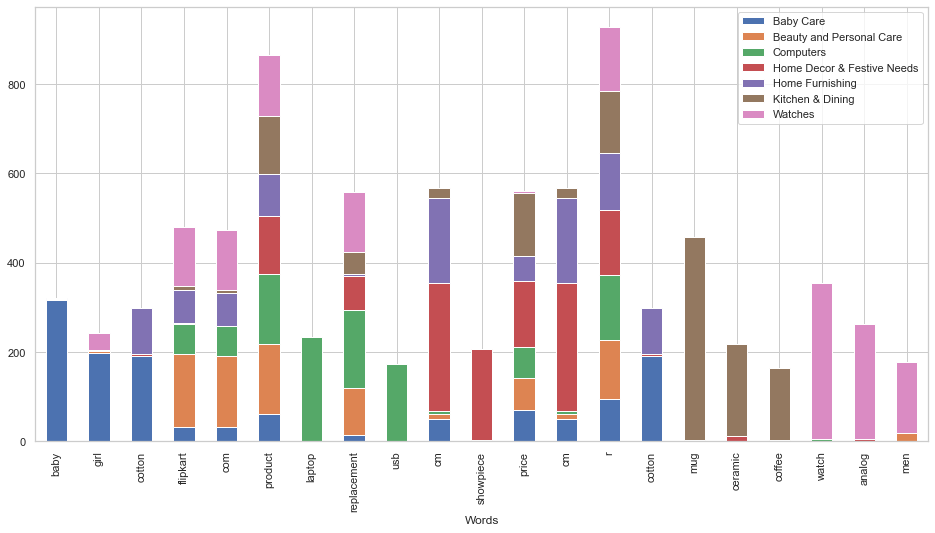

In [50]:
#set seaborn plotting aesthetics
sns.set_theme(style="whitegrid")

#create stacked bar chart
df.set_index('Words').plot(kind='bar', stacked=True, figsize=(16, 8))

## LDA Analysis

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [52]:
stopwords3=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')

text = ".".join(data["description_and_name"])

text = text.lower()
    
words=tokenizer.tokenize(text)
    
wordsFiltered=[]

for w in words:
    if w not in stopwords3:
        wordsFiltered.append(w)
    
Total = list(pd.Series(wordsFiltered).apply(lambda words : lemmatizer.lemmatize(words)))

In [53]:
Total

['elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'key',
 'feature',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 '213',
 'cm',
 'height',
 'pack',
 '2',
 'price',
 'r',
 '899',
 'curtain',
 'enhances',
 'look',
 'interior',
 'curtain',
 'made',
 '100',
 'high',
 'quality',
 'polyester',
 'fabric',
 'feature',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environment',
 'romantic',
 'loving',
 'curtain',
 'ant',
 'wrinkle',
 'anti',
 'shrinkage',
 'elegant',
 'apparance',
 'give',
 'home',
 'bright',
 'modernistic',
 'appeal',
 'design',
 'surreal',
 'attention',
 'sure',
 'steal',
 'heart',
 'contemporary',
 'eyelet',
 'valance',
 'curtain',
 'slide',
 'smoothly',
 'draw',
 'apart',
 'first',
 'thing',
 'morning',
 'welcome',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 '

In [54]:
! pip install wordcloud

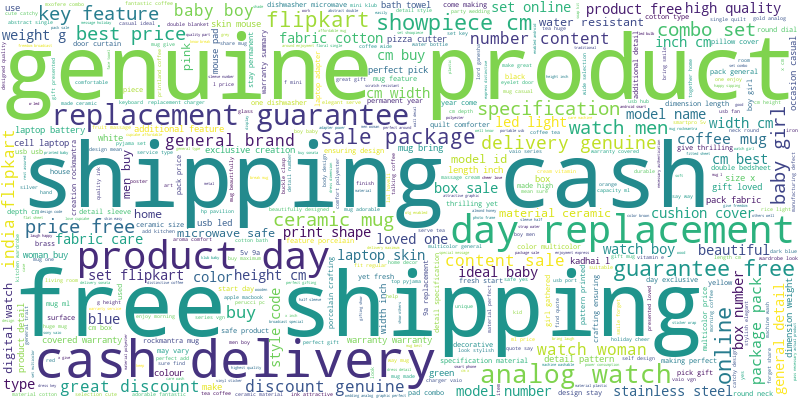

In [55]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(Total))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=800, height=400)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [56]:
! pip install gensim

In [57]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
DATA = data["description_and_name"].values.tolist()
data_words = list(sent_to_words(DATA))
# remove stop words
data_words = remove_stopwords(data_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guial\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [59]:
from pprint import pprint
# number of topics
num_topics = 7
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.014*"rs" + 0.012*"products" + 0.010*"set" + 0.009*"genuine" + '
  '0.009*"delivery" + 0.009*"cm" + 0.009*"free" + 0.009*"shipping" + '
  '0.008*"cash" + 0.008*"buy"'),
 (1,
  '0.014*"mug" + 0.013*"rs" + 0.011*"coffee" + 0.009*"cm" + 0.008*"material" + '
  '0.007*"cotton" + 0.007*"ceramic" + 0.007*"perfect" + 0.007*"one" + '
  '0.006*"watch"'),
 (2,
  '0.017*"cm" + 0.015*"usb" + 0.009*"rs" + 0.008*"light" + 0.007*"showpiece" + '
  '0.006*"box" + 0.006*"home" + 0.006*"price" + 0.006*"products" + '
  '0.006*"color"'),
 (3,
  '0.018*"cm" + 0.015*"rs" + 0.010*"products" + 0.010*"day" + 0.009*"free" + '
  '0.009*"cash" + 0.009*"replacement" + 0.009*"genuine" + 0.008*"shipping" + '
  '0.008*"buy"'),
 (4,
  '0.015*"watch" + 0.014*"replacement" + 0.013*"rs" + 0.012*"analog" + '
  '0.011*"shipping" + 0.011*"delivery" + 0.010*"men" + 0.010*"free" + '
  '0.010*"buy" + 0.010*"com"'),
 (5,
  '0.013*"baby" + 0.011*"rs" + 0.010*"specifications" + 0.008*"products" + '
  '0.008*"free" + 0.008*

# TF-IDF

## Preprocessing on "description" only

In [60]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import seaborn as sns
import matplotlib.pyplot as plt


stopwords3=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')

In [61]:
custom_stopwords = []
    
for i in freq_Total.most_common(20):
    custom_stopwords.extend([i[0]])

custom_stopwords = [item for item in custom_stopwords if item != "mug"]

custom_stopwords

['r',
 'product',
 'free',
 'buy',
 'cm',
 'delivery',
 'genuine',
 'shipping',
 'cash',
 'price',
 'replacement',
 '1',
 'day',
 '30',
 'flipkart',
 'com',
 'guarantee',
 'feature',
 'online']

In [62]:
def tokenizer_function(text):
    documents = [tokenizer.tokenize(sublist) for sublist in text]
    documents = [[word.lower() for word in sublist]
             for sublist in documents]
    documents = [[word for word in sublist if word not in stopwords3]
             for sublist in documents]
    documents = [[word for word in sublist if word not in custom_stopwords and len(word)>2]
             for sublist in documents]
    documents = [[lemmatizer.lemmatize(word) for word in sublist]
             for sublist in documents]
    
    return documents

In [63]:
token = tokenizer_function(data["description"])
token

[['key',
  'feature',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'floral',
  'curtain',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  '213',
  'height',
  'pack',
  '899',
  'curtain',
  'enhances',
  'look',
  'interior',
  'curtain',
  'made',
  '100',
  'high',
  'quality',
  'polyester',
  'fabric',
  'feature',
  'eyelet',
  'style',
  'stitch',
  'metal',
  'ring',
  'make',
  'room',
  'environment',
  'romantic',
  'loving',
  'curtain',
  'ant',
  'wrinkle',
  'anti',
  'shrinkage',
  'elegant',
  'apparance',
  'give',
  'home',
  'bright',
  'modernistic',
  'appeal',
  'design',
  'surreal',
  'attention',
  'sure',
  'steal',
  'heart',
  'contemporary',
  'eyelet',
  'valance',
  'curtain',
  'slide',
  'smoothly',
  'draw',
  'apart',
  'first',
  'thing',
  'morning',
  'welcome',
  'bright',
  'sun',
  'ray',
  'want',
  'wish',
  'good',
  'morning',
  'whole',
  'wo

In [64]:
def identity_tokenizer(text):
    return text

In [65]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    tokenizer=identity_tokenizer,
    lowercase=False,
    ngram_range = (1,1)
)
tfidf.fit(token)
text = tfidf.transform(token)

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [66]:
text.todense()

matrix([[0.04427603, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.19522686, 0.07650151,
         0.        ],
        [0.08939532, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [67]:
dataSet = pd.DataFrame(text.todense())

In [68]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", dataSet.shape)
pca = decomposition.PCA(n_components=0.99)
dataSet_pca= pca.fit_transform(dataSet)
print("Dimensions dataset après réduction PCA : ", dataSet_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 972)
Dimensions dataset après réduction PCA :  (1050, 501)


In [69]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(dataSet_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])

print(df_tsne.shape)


C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(1050, 2)


In [70]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(dataSet_pca)

df_tsne["cluster"] = cls.labels_

data["cluster"] = cls.labels_

print(df_tsne.shape)

(1050, 3)


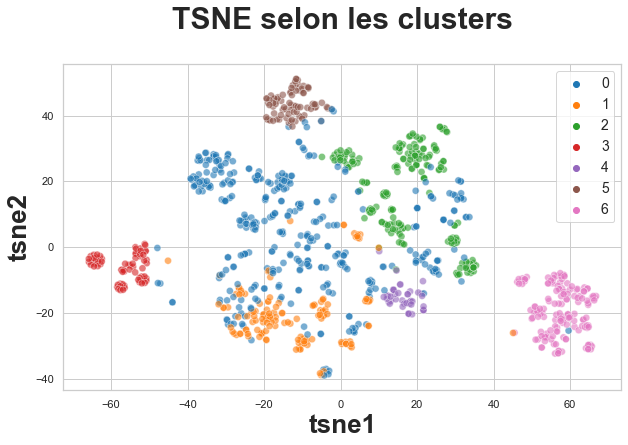

In [71]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [72]:
from sklearn.metrics import plot_confusion_matrix

cm = pd.crosstab(data["product_category_1"], cls.labels_)

cm

col_0                         0   1   2   3   4   5    6
product_category_1                                      
Baby Care                    41  13  14   1   0  81    0
Beauty and Personal Care     41  29  80   0   0   0    0
Computers                    30   0  78   0  42   0    0
Home Decor & Festive Needs   80  70   0   0   0   0    0
Home Furnishing             132   0  18   0   0   0    0
Kitchen & Dining             47  29   0  74   0   0    0
Watches                       3   0   0   0   0   0  147

In [73]:
from scipy.optimize import linear_sum_assignment as linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
js = sorted(indexes, key=lambda x: x[0])[1]
cm2 = cm[js]

cm = cm2

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


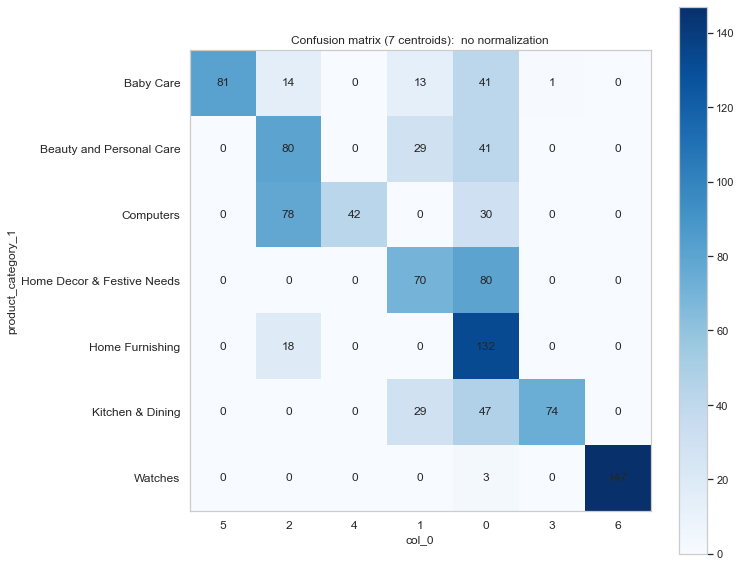

ARI :  0.32173646561876335


In [74]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap='Blues', normalize=False):
    
    # Adjust the size of the plot area ()
    plt.figure(figsize=(20, 20))

    # Show the plot
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, z, ha='center', va='center')

    # Give the plot a title and colorbar legend
    plt.title(title, size=12)
    plt.colorbar()

    # All thes stuff for the tick mark labels
    xtick_marks = np.arange(len(cm.columns))
    ytick_marks = np.arange(len(cm.index))
    plt.xticks(xtick_marks, cm.columns, size=12)
    plt.yticks(ytick_marks, cm.index, size=12)

    # Just the regular xlabel and ylabel for plot
    plt.ylabel(cm.index.name, size=12)
    plt.xlabel(cm.columns.name, size=12)

    # Setting to offset the labels with some space so they show up
    plt.subplots_adjust(left = 0.5, bottom=0.5)
    
#     plt.grid(which='major', color='w', linestyle='-', linewidth=0)
#     plt.grid(which='minor', color='red', linestyle='-', linewidth=2)
    
    plt.grid(axis = 'x', color='w', linestyle='-', linewidth=0)
    plt.grid(axis = 'y', color='w', linestyle='-', linewidth=0)


# Plot the confusion matrix DataFrame

plot_confusion_matrix(cm,  title='Confusion matrix (%d centroids):  no normalization' % len(cm.columns))

plt.show()

print("ARI : ", metrics.adjusted_rand_score(data["cluster"], data["product_category_1"]))

## Preprocessing on "description + product name"

In [75]:
token = tokenizer_function(data["description_and_name"])
token

[['elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'key',
  'feature',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'floral',
  'curtain',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  '213',
  'height',
  'pack',
  '899',
  'curtain',
  'enhances',
  'look',
  'interior',
  'curtain',
  'made',
  '100',
  'high',
  'quality',
  'polyester',
  'fabric',
  'feature',
  'eyelet',
  'style',
  'stitch',
  'metal',
  'ring',
  'make',
  'room',
  'environment',
  'romantic',
  'loving',
  'curtain',
  'ant',
  'wrinkle',
  'anti',
  'shrinkage',
  'elegant',
  'apparance',
  'give',
  'home',
  'bright',
  'modernistic',
  'appeal',
  'design',
  'surreal',
  'attention',
  'sure',
  'steal',
  'heart',
  'contemporary',
  'eyelet',
  'valance',
  'curtain',
  'slide',
  'smoothly',
  'draw',
  'apart',
  'first',
  'thing',
  'morning',
  'welco

In [76]:
def identity_tokenizer(text):
    return text

In [77]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    tokenizer=identity_tokenizer,
    lowercase=False,
    ngram_range = (1,1)
)
tfidf.fit(token)
text = tfidf.transform(token)

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [78]:
text.todense()

matrix([[0.03950008, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.17361761, 0.06803372,
         0.        ],
        [0.08323882, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [79]:
dataSet = pd.DataFrame(text.todense())

In [80]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", dataSet.shape)
pca = decomposition.PCA(n_components=0.99)
dataSet_pca= pca.fit_transform(dataSet)
print("Dimensions dataset après réduction PCA : ", dataSet_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 972)
Dimensions dataset après réduction PCA :  (1050, 493)


In [81]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(dataSet_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])

print(df_tsne.shape)

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(1050, 2)


In [82]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(dataSet_pca)

df_tsne["cluster"] = cls.labels_

data["cluster"] = cls.labels_

print(df_tsne.shape)

(1050, 3)


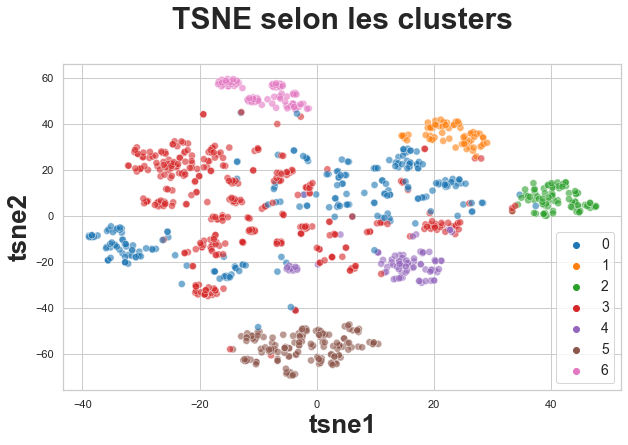

In [83]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [84]:
from sklearn.metrics import plot_confusion_matrix

cm = pd.crosstab(data["product_category_1"], cls.labels_)

cm

col_0                        0   1   2    3   4    5   6
product_category_1                                      
Baby Care                   17   7  81   41   3    0   1
Beauty and Personal Care    14   0   0   66  70    0   0
Computers                   66   0   0   73  11    0   0
Home Decor & Festive Needs  37   0   0  113   0    0   0
Home Furnishing             67  58   0   22   3    0   0
Kitchen & Dining            30   0   0   45   1    0  74
Watches                      2   0   0    1   0  147   0

In [85]:
from scipy.optimize import linear_sum_assignment as linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
js = sorted(indexes, key=lambda x: x[0])[1]
cm2 = cm[js]

cm = cm2

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


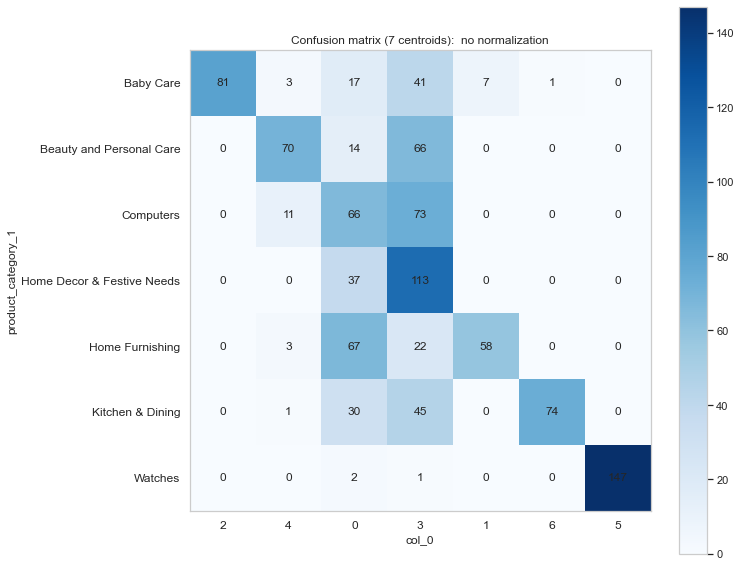

ARI :  0.2914584227608831


In [86]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap='Blues', normalize=False):
    
    # Adjust the size of the plot area ()
    plt.figure(figsize=(20, 20))

    # Show the plot
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, z, ha='center', va='center')

    # Give the plot a title and colorbar legend
    plt.title(title, size=12)
    plt.colorbar()

    # All thes stuff for the tick mark labels
    xtick_marks = np.arange(len(cm.columns))
    ytick_marks = np.arange(len(cm.index))
    plt.xticks(xtick_marks, cm.columns, size=12)
    plt.yticks(ytick_marks, cm.index, size=12)

    # Just the regular xlabel and ylabel for plot
    plt.ylabel(cm.index.name, size=12)
    plt.xlabel(cm.columns.name, size=12)

    # Setting to offset the labels with some space so they show up
    plt.subplots_adjust(left = 0.5, bottom=0.5)
    
#     plt.grid(which='major', color='w', linestyle='-', linewidth=0)
#     plt.grid(which='minor', color='red', linestyle='-', linewidth=2)
    
    plt.grid(axis = 'x', color='w', linestyle='-', linewidth=0)
    plt.grid(axis = 'y', color='w', linestyle='-', linewidth=0)


# Plot the confusion matrix DataFrame

plot_confusion_matrix(cm,  title='Confusion matrix (%d centroids):  no normalization' % len(cm.columns))

plt.show()

print("ARI : ", metrics.adjusted_rand_score(data["cluster"], data["product_category_1"]))

## Preprocessing on "product name"

In [87]:
token = tokenizer_function(data["product_name"])

In [88]:
def identity_tokenizer(text):
    return text

In [89]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    tokenizer=identity_tokenizer,
    lowercase=False,
    ngram_range = (1,1)
)
tfidf.fit(token)
text = tfidf.transform(token)

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [90]:
text.todense()

matrix([[0.        , 0.        , 0.36566341, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [91]:
dataSet = pd.DataFrame(text.todense())

In [92]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", dataSet.shape)
pca = decomposition.PCA(n_components=0.99)
dataSet_pca= pca.fit_transform(dataSet)
print("Dimensions dataset après réduction PCA : ", dataSet_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 241)
Dimensions dataset après réduction PCA :  (1050, 200)


In [93]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(dataSet_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])

print(df_tsne.shape)

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(1050, 2)


In [94]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(dataSet_pca)

df_tsne["cluster"] = cls.labels_

data["cluster"] = cls.labels_

print(df_tsne.shape)

(1050, 3)


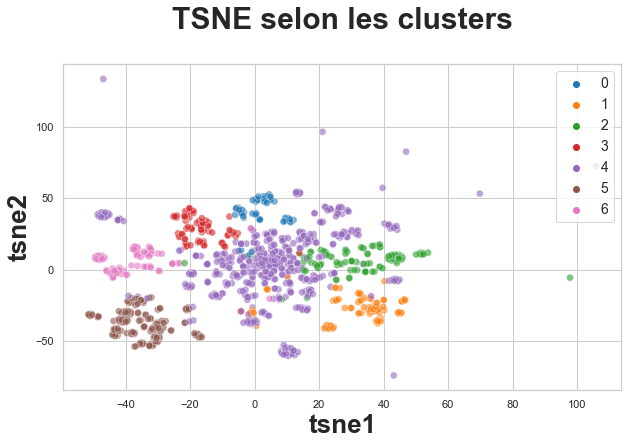

In [95]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [96]:
from sklearn.metrics import plot_confusion_matrix

cm = pd.crosstab(data["product_category_1"], cls.labels_)

cm

col_0                        0   1    2   3    4    5   6
product_category_1                                       
Baby Care                    0   4    0  82   63    0   1
Beauty and Personal Care     0  68    1   0   81    0   0
Computers                   43  11    0   0   96    0   0
Home Decor & Festive Needs  10   0  101   0   36    0   3
Home Furnishing              0   5    0   0  145    0   0
Kitchen & Dining             0   3    0   0   73    0  74
Watches                      0   0    0   0    2  148   0

In [97]:
from scipy.optimize import linear_sum_assignment as linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
js = sorted(indexes, key=lambda x: x[0])[1]
cm2 = cm[js]

cm = cm2

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


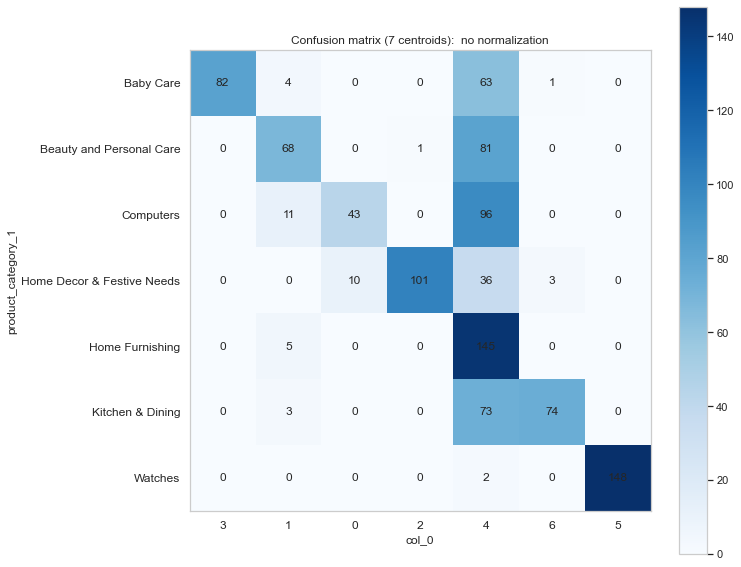

ARI :  0.2936664962132275


In [98]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap='Blues', normalize=False):
    
    # Adjust the size of the plot area ()
    plt.figure(figsize=(20, 20))

    # Show the plot
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, z, ha='center', va='center')

    # Give the plot a title and colorbar legend
    plt.title(title, size=12)
    plt.colorbar()

    # All thes stuff for the tick mark labels
    xtick_marks = np.arange(len(cm.columns))
    ytick_marks = np.arange(len(cm.index))
    plt.xticks(xtick_marks, cm.columns, size=12)
    plt.yticks(ytick_marks, cm.index, size=12)

    # Just the regular xlabel and ylabel for plot
    plt.ylabel(cm.index.name, size=12)
    plt.xlabel(cm.columns.name, size=12)

    # Setting to offset the labels with some space so they show up
    plt.subplots_adjust(left = 0.5, bottom=0.5)
    
#     plt.grid(which='major', color='w', linestyle='-', linewidth=0)
#     plt.grid(which='minor', color='red', linestyle='-', linewidth=2)
    
    plt.grid(axis = 'x', color='w', linestyle='-', linewidth=0)
    plt.grid(axis = 'y', color='w', linestyle='-', linewidth=0)


# Plot the confusion matrix DataFrame

plot_confusion_matrix(cm,  title='Confusion matrix (%d centroids):  no normalization' % len(cm.columns))

plt.show()

print("ARI : ", metrics.adjusted_rand_score(data["cluster"], data["product_category_1"]))

# Doc2Vec

## Doc2Vec on "description + product name"

In [145]:
import smart_open
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import seaborn as sns
import matplotlib.pyplot as plt
import gensim

stopwords4=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')

def read_corpus(fname, tokens_only=False):
    for i, line in enumerate(fname):
        tokens = tokenizer.tokenize(line)
        tokens = [word.lower() for word in tokens]
        tokens = [word for word in tokens if word not in stopwords4]
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        if tokens_only:
            yield tokens
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus(data["description_and_name"]))

In [146]:
train_corpus

[TaggedDocument(words=['elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'r', '899', 'curtain', 'enhances', 'look', 'interior', 'curtain', 'made', '100', 'high', 'quality', 'polyester', 'fabric', 'feature', 'eyelet', 'style', 'stitch', 'metal', 'ring', 'make', 'room', 'environment', 'romantic', 'loving', 'curtain', 'ant', 'wrinkle', 'anti', 'shrinkage', 'elegant', 'apparance', 'give', 'home', 'bright', 'modernistic', 'appeal', 'design', 'surreal', 'attention', 'sure', 'steal', 'heart', 'contemporary', 'eyelet', 'valance', 'curtain', 'slide', 'smoothly', 'draw', 'apart', 'first', 'thing', 'morning', 'welcome', 'bright', 'sun', 'ray', 'want', 'wish', 'good', 'morning', 'whole', 'world', 'draw', 'close', 'evening', 'cre

In [147]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=100, min_count=2, epochs=40, workers=4)

In [148]:
model.build_vocab(train_corpus)

In [149]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [150]:
tab = []

for i in range(0,1050):
    tab.append(model.docvecs.get_vector(i))
    
tab = np.array(tab)

tab

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  after removing the cwd from sys.path.


array([[-0.22468773, -0.23568001,  0.19083074, ..., -0.33157554,
        -1.0227106 ,  0.8505559 ],
       [-0.15094589, -0.3654237 , -0.12661636, ...,  0.11765209,
         0.04934109, -0.06854803],
       [-0.44364408, -0.5789361 , -0.70125395, ..., -0.00769467,
         0.5853404 , -0.16283397],
       ...,
       [-0.22267699,  0.4504341 ,  0.23928782, ..., -0.23454472,
         0.08720102, -0.11876068],
       [-0.03898428,  0.17756367,  0.19451743, ..., -0.06416927,
        -0.03900529, -0.07027359],
       [-0.11630575,  0.21695474,  0.08846509, ..., -0.06674782,
        -0.00322111, -0.05472761]], dtype=float32)

In [151]:
dataSet = pd.DataFrame(tab)

In [152]:
dataSet

0         1         2         3         4         5         6   \
0    -0.224688 -0.235680  0.190831  1.260830 -0.277850 -0.168258 -0.364253   
1    -0.150946 -0.365424 -0.126616 -0.093021 -0.077049 -0.626084  0.296342   
2    -0.443644 -0.578936 -0.701254  0.323881 -0.527418 -0.643508  1.222014   
3    -1.110733 -0.563002  0.335316 -0.304421  0.097263 -0.521626 -0.115218   
4    -1.165087  0.001939  0.288269  0.127350  0.138328 -0.621526  0.610064   
...        ...       ...       ...       ...       ...       ...       ...   
1045 -0.883912  2.237339  0.441580 -1.079883 -0.079957 -2.425733  1.390626   
1046 -1.284673  0.286858  0.546913  0.083716  0.611417 -1.471604  0.145863   
1047 -0.222677  0.450434  0.239288 -0.307655  0.203339 -0.942396 -0.197602   
1048 -0.038984  0.177564  0.194517 -0.098032  0.079202 -0.440450  0.087325   
1049 -0.116306  0.216955  0.088465 -0.144113  0.100339 -0.467366 -0.039145   

            7         8         9   ...        90        91        92  \
0     0.000629 -0.712943  0.833065  ...  0.262928  1.456656  0.238454   
1     0.075867  0.030524  0.336406  ...  0.776827 -0.139072 -0.180214   
2     0.146977 -0.879828  0.600578  ...  1.126078  0.467582 -0.204409   
3     0.529172 -0.249258  1.316618  ...  1.343032  0.006049  0.079682   
4     0.764071 -0.752190  0.992085  ...  1.130806  0.130144  0.090957   
...        ...       ...       ...  ...       ...       ...       ...   
1045  0.723061 -1.544920 -0.452318  ...  0.102732  1.167112 -0.955406   
1046  0.181684 -1.207276  1.345133  ... -0.148810  1.333395 -0.656733   
1047  0.631033 -0.439378  0.370735  ...  0.265461  0.380405 -0.389270   
1048  0.450081 -0.142937  0.118193  ...  0.313171  0.150074 -0.166315   
1049  0.364774 -0.185424  0.210815  ...  0.189224  0.143796 -0.170981   

            93        94        95        96        97        98        99  
0     0.558517  0.595426  0.491566  1.343715 -0.331576 -1.022711  0.850556  
1     0.201041 -0.411464 -0.242541 -0.186702  0.117652  0.049341 -0.068548  
2     0.013837  0.343402 -0.399451 -0.918432 -0.007695  0.585340 -0.162834  
3     0.696985  0.391715 -0.064330 -0.154941 -0.680498  0.213591 -1.078197  
4     0.832277  0.959491  0.343155 -0.329987 -0.892898  0.554165 -0.087078  
...        ...       ...       ...       ...       ...       ...       ...  
1045 -1.376683  1.286808  0.259377  1.127898 -0.305476  1.705155  1.126881  
1046 -0.142976  1.661360  0.637921  0.907594 -0.871133  1.231643 -0.258986  
1047 -0.289332  0.687816  0.341720  0.276685 -0.234545  0.087201 -0.118761  
1048 -0.016313  0.259976  0.074372  0.141681 -0.064169 -0.039005 -0.070274  
1049 -0.152520  0.283897  0.225990  0.083559 -0.066748 -0.003221 -0.054728  

[1050 rows x 100 columns]

In [153]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", dataSet.shape)
pca = decomposition.PCA(n_components=0.99)
dataSet_pca= pca.fit_transform(dataSet)
print("Dimensions dataset après réduction PCA : ", dataSet_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 100)
Dimensions dataset après réduction PCA :  (1050, 48)


In [154]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(dataSet_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])

print(df_tsne.shape)

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(1050, 2)


In [155]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(dataSet_pca)

df_tsne["cluster"] = cls.labels_

data["cluster"] = cls.labels_

print(df_tsne.shape)

(1050, 3)


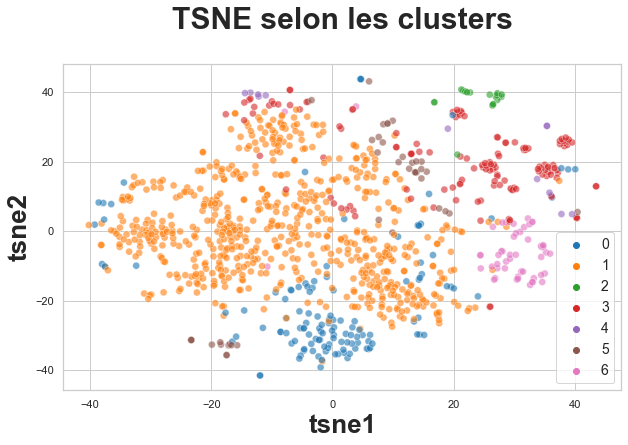

In [156]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [157]:
from sklearn.metrics import plot_confusion_matrix

cm = pd.crosstab(data["product_category_1"], cls.labels_)

cm

col_0                        0    1   2   3   4   5   6
product_category_1                                     
Baby Care                   79   58   0   2   2   4   5
Beauty and Personal Care    19  114   2   1   0  13   1
Computers                    1   98  16  14   1  20   0
Home Decor & Festive Needs   3   95   0  37  10   3   2
Home Furnishing             12   92   0   3   0   0  43
Kitchen & Dining             5   63   1  81   0   0   0
Watches                      9  140   0   0   0   1   0

In [158]:
from scipy.optimize import linear_sum_assignment as linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
js = sorted(indexes, key=lambda x: x[0])[1]
cm2 = cm[js]

cm = cm2

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


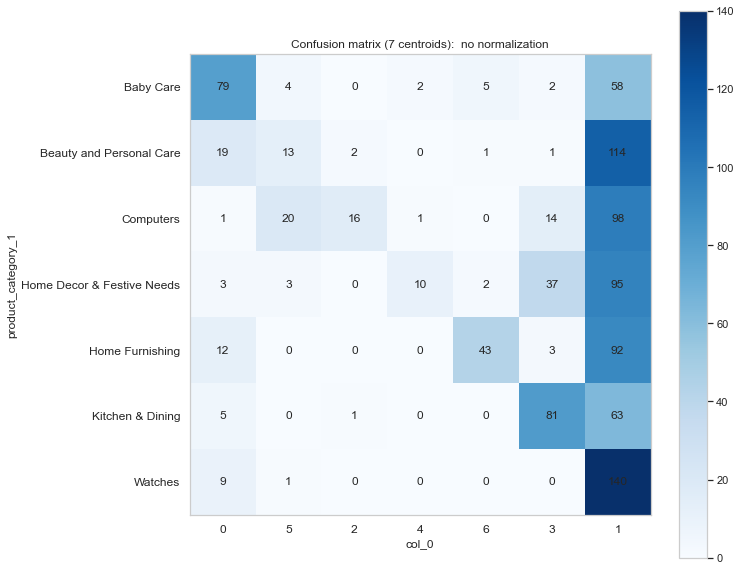

ARI :  0.06597935705029472


In [159]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap='Blues', normalize=False):
    
    # Adjust the size of the plot area ()
    plt.figure(figsize=(20, 20))

    # Show the plot
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, z, ha='center', va='center')

    # Give the plot a title and colorbar legend
    plt.title(title, size=12)
    plt.colorbar()

    # All thes stuff for the tick mark labels
    xtick_marks = np.arange(len(cm.columns))
    ytick_marks = np.arange(len(cm.index))
    plt.xticks(xtick_marks, cm.columns, size=12)
    plt.yticks(ytick_marks, cm.index, size=12)

    # Just the regular xlabel and ylabel for plot
    plt.ylabel(cm.index.name, size=12)
    plt.xlabel(cm.columns.name, size=12)

    # Setting to offset the labels with some space so they show up
    plt.subplots_adjust(left = 0.5, bottom=0.5)
    
#     plt.grid(which='major', color='w', linestyle='-', linewidth=0)
#     plt.grid(which='minor', color='red', linestyle='-', linewidth=2)
    
    plt.grid(axis = 'x', color='w', linestyle='-', linewidth=0)
    plt.grid(axis = 'y', color='w', linestyle='-', linewidth=0)


# Plot the confusion matrix DataFrame

plot_confusion_matrix(cm,  title='Confusion matrix (%d centroids):  no normalization' % len(cm.columns))

plt.show()

print("ARI : ", metrics.adjusted_rand_score(data["cluster"], data["product_category_1"]))

## Doc2Vec on product name only

In [160]:
import smart_open
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import seaborn as sns
import matplotlib.pyplot as plt
import gensim

stopwords4=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')

def read_corpus(fname, tokens_only=False):
    for i, line in enumerate(fname):
        tokens = tokenizer.tokenize(line)
        tokens = [word.lower() for word in tokens]
        tokens = [word for word in tokens if word not in stopwords4]
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        if tokens_only:
            yield tokens
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus(data["product_name"]))

In [161]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=100, min_count=2, epochs=40, workers=4)

In [162]:
model.build_vocab(train_corpus)

In [163]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [164]:
tab = []

for i in range(0,1050):
    tab.append(model.docvecs.get_vector(i))
    
tab = np.array(tab)

tab

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  after removing the cwd from sys.path.


array([[-0.05082952, -0.00690476,  0.02341275, ..., -0.05846563,
         0.04527636, -0.05682142],
       [-0.05305073,  0.01696818,  0.01696094, ..., -0.04169355,
         0.02011309, -0.00403331],
       [-0.06300978,  0.01536659,  0.03689174, ..., -0.0434264 ,
         0.03083261, -0.01702633],
       ...,
       [-0.08984912,  0.03293341,  0.05390412, ..., -0.09125222,
         0.02136617, -0.03862315],
       [-0.04797017,  0.01360321,  0.02296948, ..., -0.03738216,
        -0.00206046, -0.01656926],
       [-0.0849603 ,  0.028434  ,  0.03629653, ..., -0.06752104,
         0.02727264, -0.02762806]], dtype=float32)

In [165]:
dataSet = pd.DataFrame(tab)

In [166]:
dataSet

0         1         2         3         4         5         6   \
0    -0.050830 -0.006905  0.023413  0.023427  0.020463 -0.114083 -0.011817   
1    -0.053051  0.016968  0.016961 -0.010981 -0.016781 -0.054247  0.010839   
2    -0.063010  0.015367  0.036892 -0.016436 -0.000240 -0.063901  0.026501   
3    -0.099441  0.037695  0.057854 -0.002381 -0.005023 -0.140016  0.027774   
4    -0.039029 -0.000549  0.022578 -0.001383 -0.014431 -0.059770  0.012558   
...        ...       ...       ...       ...       ...       ...       ...   
1045 -0.085722  0.032980  0.051793 -0.015453  0.001790 -0.150295  0.016595   
1046 -0.041876  0.000582  0.026900 -0.019863  0.024885 -0.064143 -0.009256   
1047 -0.089849  0.032933  0.053904 -0.016258 -0.000929 -0.134912  0.026542   
1048 -0.047970  0.013603  0.022969 -0.003898  0.011755 -0.074599 -0.011469   
1049 -0.084960  0.028434  0.036297 -0.015162  0.014863 -0.114791  0.008694   

            7         8         9   ...        90        91        92  \
0     0.111308 -0.071864 -0.043429  ...  0.063848  0.040480 -0.043741   
1     0.069425 -0.018824 -0.025065  ...  0.044129  0.022701 -0.023333   
2     0.077547 -0.030247 -0.027253  ...  0.054636  0.023667 -0.044595   
3     0.192689 -0.072382 -0.053289  ...  0.133121  0.065779 -0.066950   
4     0.079879 -0.018528 -0.009367  ...  0.051178  0.010890 -0.015499   
...        ...       ...       ...  ...       ...       ...       ...   
1045  0.204172 -0.087223 -0.063845  ...  0.142557  0.076667 -0.061870   
1046  0.088787 -0.028395 -0.026950  ...  0.070042  0.017251 -0.021381   
1047  0.191593 -0.079797 -0.056432  ...  0.148445  0.066947 -0.062181   
1048  0.098365 -0.028114 -0.018665  ...  0.096232  0.031343 -0.022220   
1049  0.172815 -0.065105 -0.038698  ...  0.131221  0.056388 -0.043720   

            93        94        95        96        97        98        99  
0     0.049299  0.062224  0.050561  0.024991 -0.058466  0.045276 -0.056821  
1     0.012941  0.047970  0.028562  0.036566 -0.041694  0.020113 -0.004033  
2     0.009361  0.078258  0.040026  0.032671 -0.043426  0.030833 -0.017026  
3     0.027077  0.139024  0.081058  0.060394 -0.073604  0.030729 -0.032070  
4     0.003831  0.035442  0.009428  0.008141 -0.013646  0.005723 -0.015820  
...        ...       ...       ...       ...       ...       ...       ...  
1045  0.055889  0.163094  0.086215  0.063151 -0.107676  0.023548 -0.031116  
1046  0.027963  0.075834  0.048145  0.029065 -0.037305 -0.005217 -0.018708  
1047  0.042902  0.167238  0.095240  0.058617 -0.091252  0.021366 -0.038623  
1048  0.033362  0.082293  0.052978  0.038483 -0.037382 -0.002060 -0.016569  
1049  0.031983  0.148859  0.079716  0.058651 -0.067521  0.027273 -0.027628  

[1050 rows x 100 columns]

In [167]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", dataSet.shape)
pca = decomposition.PCA(n_components=0.99)
dataSet_pca= pca.fit_transform(dataSet)
print("Dimensions dataset après réduction PCA : ", dataSet_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 100)
Dimensions dataset après réduction PCA :  (1050, 65)


In [168]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(dataSet_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])

print(df_tsne.shape)

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(1050, 2)


In [169]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(dataSet_pca)

df_tsne["cluster"] = cls.labels_

data["cluster"] = cls.labels_

print(df_tsne.shape)

(1050, 3)


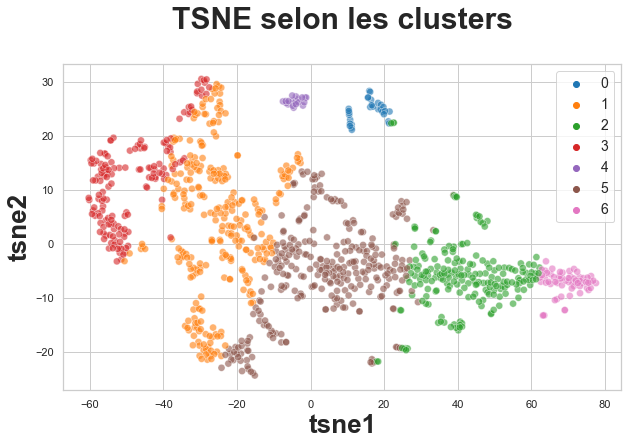

In [170]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [171]:
from sklearn.metrics import plot_confusion_matrix

cm = pd.crosstab(data["product_category_1"], cls.labels_)

cm

col_0                        0   1   2   3   4   5   6
product_category_1                                    
Baby Care                    0  56  29  16   0  44   5
Beauty and Personal Care     0  24  51   8   0  52  15
Computers                   29  22  37  11   0  31  20
Home Decor & Festive Needs   0  38  38  13   0  45  16
Home Furnishing              0  55  14  20  19  42   0
Kitchen & Dining             0  46  19  29   0  52   4
Watches                      0  51  15  56   0  28   0

In [172]:
from scipy.optimize import linear_sum_assignment as linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
js = sorted(indexes, key=lambda x: x[0])[1]
cm2 = cm[js]

cm = cm2

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


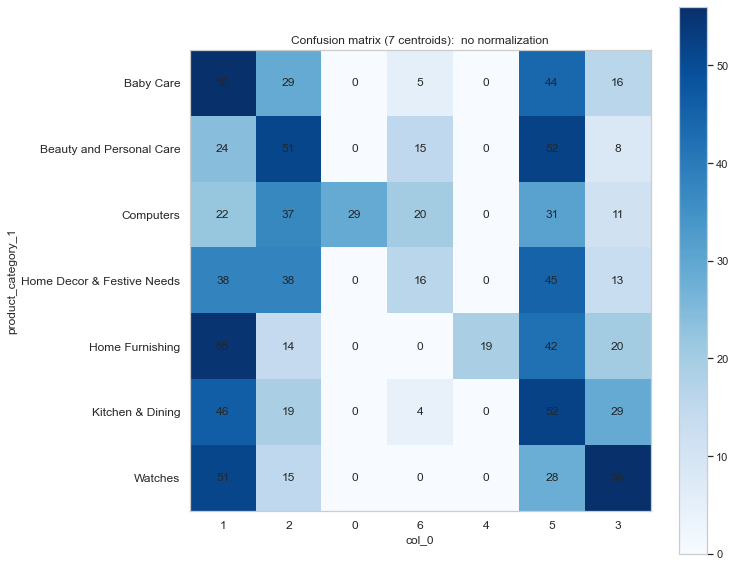

ARI :  0.032032368992390495


In [173]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap='Blues', normalize=False):
    
    # Adjust the size of the plot area ()
    plt.figure(figsize=(20, 20))

    # Show the plot
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, z, ha='center', va='center')

    # Give the plot a title and colorbar legend
    plt.title(title, size=12)
    plt.colorbar()

    # All thes stuff for the tick mark labels
    xtick_marks = np.arange(len(cm.columns))
    ytick_marks = np.arange(len(cm.index))
    plt.xticks(xtick_marks, cm.columns, size=12)
    plt.yticks(ytick_marks, cm.index, size=12)

    # Just the regular xlabel and ylabel for plot
    plt.ylabel(cm.index.name, size=12)
    plt.xlabel(cm.columns.name, size=12)

    # Setting to offset the labels with some space so they show up
    plt.subplots_adjust(left = 0.5, bottom=0.5)
    
#     plt.grid(which='major', color='w', linestyle='-', linewidth=0)
#     plt.grid(which='minor', color='red', linestyle='-', linewidth=2)
    
    plt.grid(axis = 'x', color='w', linestyle='-', linewidth=0)
    plt.grid(axis = 'y', color='w', linestyle='-', linewidth=0)


# Plot the confusion matrix DataFrame

plot_confusion_matrix(cm,  title='Confusion matrix (%d centroids):  no normalization' % len(cm.columns))

plt.show()

print("ARI : ", metrics.adjusted_rand_score(data["cluster"], data["product_category_1"]))

# Bert

In [174]:
!pip install tensorflow

  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
  Using cached tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
  Using cached libclang-12.0.0-py2.py3-none-win_amd64.whl (13.1 MB)
  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached google_auth-2.3.3-py2.py3-none-any.whl (155 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using 

In [175]:
!pip install tensorflow_hub

  Using cached tensorflow_hub-0.12.0-py2.py3-none-any.whl (108 kB)


In [176]:
!pip install tensorflow_text

In [177]:
# !pip install --user tensorflow_text

In [178]:
import tensorflow as tf

In [179]:
import tensorflow_hub as hub

In [180]:
import tensorflow_text as text

In [181]:
# import os

In [182]:
# os.environ['TFHUB_CACHE_DIR'] = '/home/user/workspace/tf_cache' #Any folder that you can access

## Bert with a first processing method

In [222]:
bert_preprocess = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")

In [223]:
bert_encoder = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [224]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [225]:
model_bert = get_sentence_embeding(list(data["description_and_name"]))

In [226]:
model_bert

<tf.Tensor: shape=(1050, 768), dtype=float32, numpy=
array([[-0.88656193, -0.6828622 , -0.9968865 , ..., -0.9932564 ,
        -0.7654006 ,  0.75234866],
       [-0.8319768 , -0.68498874, -0.99491453, ..., -0.98177266,
        -0.6997942 ,  0.6767254 ],
       [-0.8038582 , -0.7252422 , -0.9925761 , ..., -0.9805889 ,
        -0.7134796 ,  0.6825014 ],
       ...,
       [-0.62104464, -0.58502084, -0.99337167, ..., -0.976715  ,
        -0.47342137,  0.70773125],
       [-0.77193344, -0.61223567, -0.99371856, ..., -0.96805716,
        -0.5656111 ,  0.81458735],
       [-0.7165592 , -0.5338502 , -0.98577046, ..., -0.95220625,
        -0.49435544,  0.7788625 ]], dtype=float32)>

In [227]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", model_bert.shape)
pca = decomposition.PCA(n_components=0.99)
model_bert_pca= pca.fit_transform(model_bert)
print("Dimensions dataset après réduction PCA : ", model_bert_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 768)
Dimensions dataset après réduction PCA :  (1050, 123)


In [228]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(model_bert_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])

print(df_tsne.shape)

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(1050, 2)


In [229]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(model_bert_pca)

df_tsne["cluster"] = cls.labels_

data["cluster"] = cls.labels_

print(df_tsne.shape)

(1050, 3)


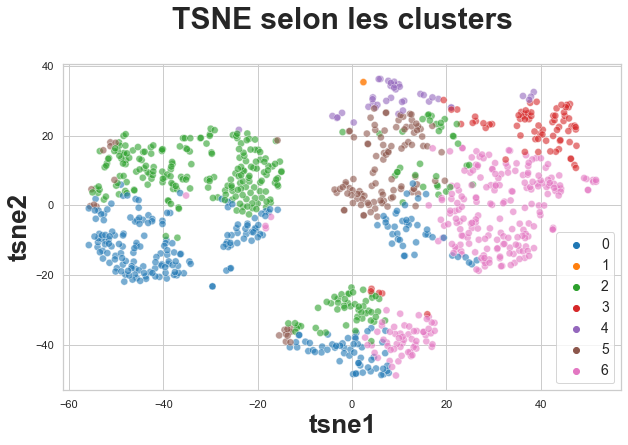

In [230]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [231]:
from sklearn.metrics import plot_confusion_matrix

cm = pd.crosstab(data["product_category_1"], cls.labels_)

cm

col_0                        0  1   2   3   4   5   6
product_category_1                                   
Baby Care                   50  0  18   4   1  29  48
Beauty and Personal Care    14  0  79   2   6  18  31
Computers                   29  1  44  10   5  10  51
Home Decor & Festive Needs  20  0  41  19   7  13  50
Home Furnishing             78  1   3  16   2  10  40
Kitchen & Dining            33  0   9  25  17  34  32
Watches                     38  0  95   0   2   5  10

In [232]:
from scipy.optimize import linear_sum_assignment as linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
js = sorted(indexes, key=lambda x: x[0])[1]
cm2 = cm[js]

cm = cm2

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


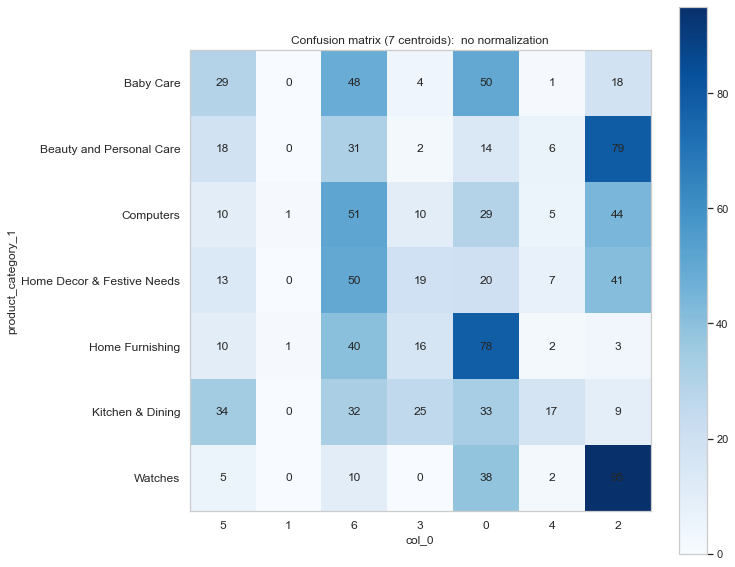

ARI :  0.07353392753386702


In [233]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap='Blues', normalize=False):
    
    # Adjust the size of the plot area ()
    plt.figure(figsize=(20, 20))

    # Show the plot
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, z, ha='center', va='center')

    # Give the plot a title and colorbar legend
    plt.title(title, size=12)
    plt.colorbar()

    # All thes stuff for the tick mark labels
    xtick_marks = np.arange(len(cm.columns))
    ytick_marks = np.arange(len(cm.index))
    plt.xticks(xtick_marks, cm.columns, size=12)
    plt.yticks(ytick_marks, cm.index, size=12)

    # Just the regular xlabel and ylabel for plot
    plt.ylabel(cm.index.name, size=12)
    plt.xlabel(cm.columns.name, size=12)

    # Setting to offset the labels with some space so they show up
    plt.subplots_adjust(left = 0.5, bottom=0.5)
    
#     plt.grid(which='major', color='w', linestyle='-', linewidth=0)
#     plt.grid(which='minor', color='red', linestyle='-', linewidth=2)
    
    plt.grid(axis = 'x', color='w', linestyle='-', linewidth=0)
    plt.grid(axis = 'y', color='w', linestyle='-', linewidth=0)


# Plot the confusion matrix DataFrame

plot_confusion_matrix(cm,  title='Confusion matrix (%d centroids):  no normalization' % len(cm.columns))

plt.show()

print("ARI : ", metrics.adjusted_rand_score(data["cluster"], data["product_category_1"]))

## Bert with an other preprocessing method

In [234]:
bert_preprocess = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1")

In [235]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [236]:
model_bert = get_sentence_embeding(list(data["description_and_name"]))

In [237]:
model_bert

<tf.Tensor: shape=(1050, 768), dtype=float32, numpy=
array([[-0.88656193, -0.6828622 , -0.9968865 , ..., -0.9932564 ,
        -0.7654006 ,  0.75234866],
       [-0.8319768 , -0.68498874, -0.99491453, ..., -0.98177266,
        -0.6997942 ,  0.6767254 ],
       [-0.8038582 , -0.7252422 , -0.9925761 , ..., -0.9805889 ,
        -0.7134796 ,  0.6825014 ],
       ...,
       [-0.62104464, -0.58502084, -0.99337167, ..., -0.976715  ,
        -0.47342137,  0.70773125],
       [-0.77193344, -0.61223567, -0.99371856, ..., -0.96805716,
        -0.5656111 ,  0.81458735],
       [-0.7165592 , -0.5338502 , -0.98577046, ..., -0.95220625,
        -0.49435544,  0.7788625 ]], dtype=float32)>

In [238]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", model_bert.shape)
pca = decomposition.PCA(n_components=0.99)
model_bert_pca= pca.fit_transform(model_bert)
print("Dimensions dataset après réduction PCA : ", model_bert_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 768)
Dimensions dataset après réduction PCA :  (1050, 123)


In [239]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(model_bert_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])

print(df_tsne.shape)

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(1050, 2)


In [240]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(model_bert_pca)

df_tsne["cluster"] = cls.labels_

data["cluster"] = cls.labels_

print(df_tsne.shape)

(1050, 3)


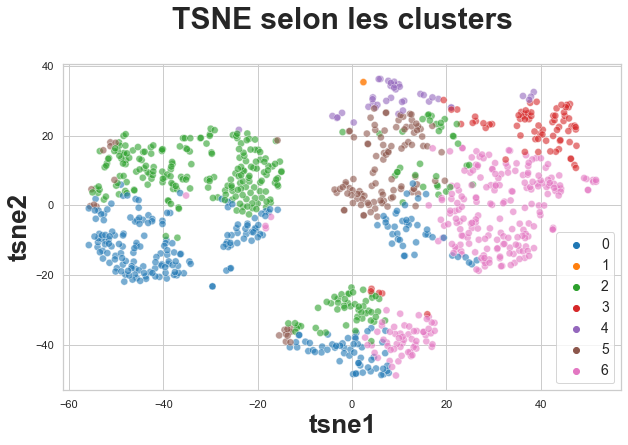

In [241]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [242]:
from sklearn.metrics import plot_confusion_matrix

cm = pd.crosstab(data["product_category_1"], cls.labels_)

cm

col_0                        0  1   2   3   4   5   6
product_category_1                                   
Baby Care                   50  0  18   4   1  29  48
Beauty and Personal Care    14  0  79   2   6  18  31
Computers                   29  1  44  10   5  10  51
Home Decor & Festive Needs  20  0  41  19   7  13  50
Home Furnishing             78  1   3  16   2  10  40
Kitchen & Dining            33  0   9  25  17  34  32
Watches                     38  0  95   0   2   5  10

In [243]:
from scipy.optimize import linear_sum_assignment as linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
js = sorted(indexes, key=lambda x: x[0])[1]
cm2 = cm[js]

cm = cm2

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


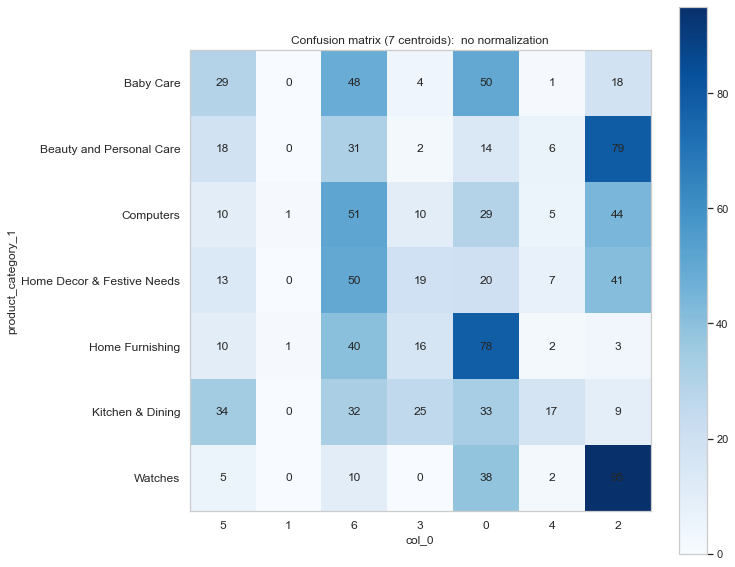

ARI :  0.07353392753386702


In [244]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap='Blues', normalize=False):
    
    # Adjust the size of the plot area ()
    plt.figure(figsize=(20, 20))

    # Show the plot
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, z, ha='center', va='center')

    # Give the plot a title and colorbar legend
    plt.title(title, size=12)
    plt.colorbar()

    # All thes stuff for the tick mark labels
    xtick_marks = np.arange(len(cm.columns))
    ytick_marks = np.arange(len(cm.index))
    plt.xticks(xtick_marks, cm.columns, size=12)
    plt.yticks(ytick_marks, cm.index, size=12)

    # Just the regular xlabel and ylabel for plot
    plt.ylabel(cm.index.name, size=12)
    plt.xlabel(cm.columns.name, size=12)

    # Setting to offset the labels with some space so they show up
    plt.subplots_adjust(left = 0.5, bottom=0.5)
    
#     plt.grid(which='major', color='w', linestyle='-', linewidth=0)
#     plt.grid(which='minor', color='red', linestyle='-', linewidth=2)
    
    plt.grid(axis = 'x', color='w', linestyle='-', linewidth=0)
    plt.grid(axis = 'y', color='w', linestyle='-', linewidth=0)


# Plot the confusion matrix DataFrame

plot_confusion_matrix(cm,  title='Confusion matrix (%d centroids):  no normalization' % len(cm.columns))

plt.show()

print("ARI : ", metrics.adjusted_rand_score(data["cluster"], data["product_category_1"]))

## Bert on "product name"

In [245]:
bert_preprocess = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1")

In [246]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [247]:
model_bert = get_sentence_embeding(list(data["product_name"]))

In [248]:
model_bert

<tf.Tensor: shape=(1050, 768), dtype=float32, numpy=
array([[-0.8860454 , -0.43437853, -0.8659612 , ..., -0.62830245,
        -0.6937669 ,  0.8904067 ],
       [-0.86267126, -0.4827879 , -0.9020356 , ..., -0.76614106,
        -0.68702716,  0.8057222 ],
       [-0.7608294 , -0.25762743, -0.19278514, ..., -0.12969777,
        -0.59554136,  0.8841668 ],
       ...,
       [-0.83917505, -0.5010571 , -0.91512865, ..., -0.8748405 ,
        -0.63217413,  0.7787977 ],
       [-0.8578963 , -0.5460234 , -0.94304985, ..., -0.839988  ,
        -0.67307234,  0.8408756 ],
       [-0.8937433 , -0.5608205 , -0.95730275, ..., -0.8406605 ,
        -0.68740225,  0.8791463 ]], dtype=float32)>

In [249]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", model_bert.shape)
pca = decomposition.PCA(n_components=0.99)
model_bert_pca= pca.fit_transform(model_bert)
print("Dimensions dataset après réduction PCA : ", model_bert_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 768)
Dimensions dataset après réduction PCA :  (1050, 110)


In [250]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(model_bert_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])

print(df_tsne.shape)

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(1050, 2)


In [251]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(model_bert_pca)

df_tsne["cluster"] = cls.labels_

data["cluster"] = cls.labels_

print(df_tsne.shape)

(1050, 3)


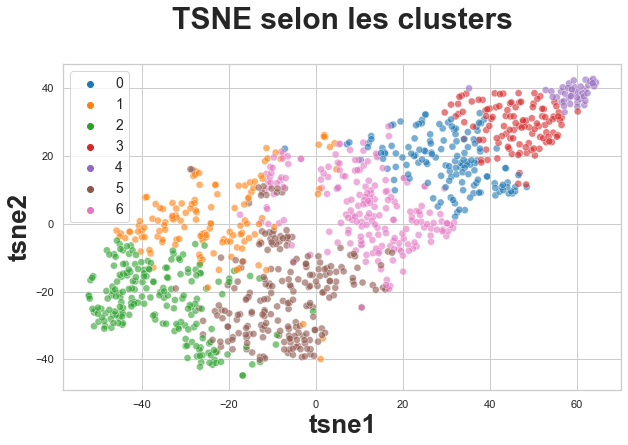

In [252]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [253]:
from sklearn.metrics import plot_confusion_matrix

cm = pd.crosstab(data["product_category_1"], cls.labels_)

cm

col_0                        0   1    2   3   4   5   6
product_category_1                                     
Baby Care                   29   7    6  24   7  39  38
Beauty and Personal Care    18  13   16  22   3  41  37
Computers                   14  42   36  11   1  28  18
Home Decor & Festive Needs   6  23   14   4   7  63  33
Home Furnishing             37   1   12  15   7  33  45
Kitchen & Dining            39  13    9  38  14  13  24
Watches                      0  35  106   0   1   3   5

In [254]:
from scipy.optimize import linear_sum_assignment as linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
js = sorted(indexes, key=lambda x: x[0])[1]
cm2 = cm[js]

cm = cm2

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


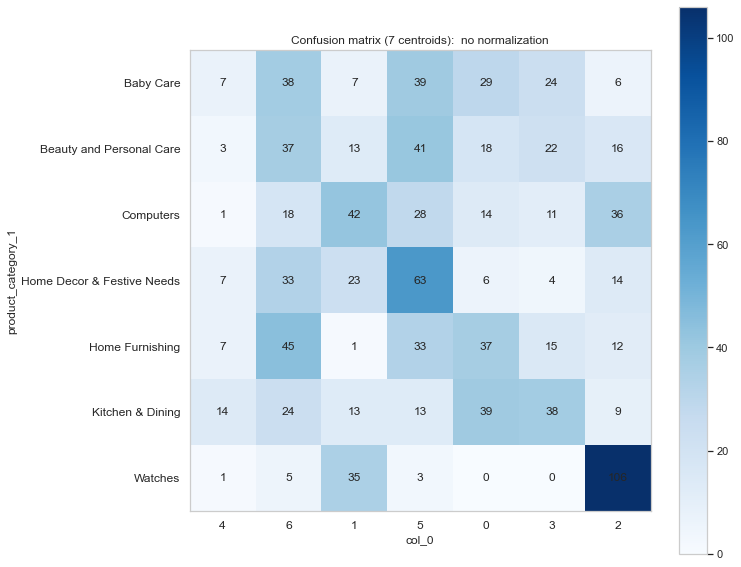

ARI :  0.09900133596871392


In [255]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap='Blues', normalize=False):
    
    # Adjust the size of the plot area ()
    plt.figure(figsize=(20, 20))

    # Show the plot
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, z, ha='center', va='center')

    # Give the plot a title and colorbar legend
    plt.title(title, size=12)
    plt.colorbar()

    # All thes stuff for the tick mark labels
    xtick_marks = np.arange(len(cm.columns))
    ytick_marks = np.arange(len(cm.index))
    plt.xticks(xtick_marks, cm.columns, size=12)
    plt.yticks(ytick_marks, cm.index, size=12)

    # Just the regular xlabel and ylabel for plot
    plt.ylabel(cm.index.name, size=12)
    plt.xlabel(cm.columns.name, size=12)

    # Setting to offset the labels with some space so they show up
    plt.subplots_adjust(left = 0.5, bottom=0.5)
    
#     plt.grid(which='major', color='w', linestyle='-', linewidth=0)
#     plt.grid(which='minor', color='red', linestyle='-', linewidth=2)
    
    plt.grid(axis = 'x', color='w', linestyle='-', linewidth=0)
    plt.grid(axis = 'y', color='w', linestyle='-', linewidth=0)


# Plot the confusion matrix DataFrame

plot_confusion_matrix(cm,  title='Confusion matrix (%d centroids):  no normalization' % len(cm.columns))

plt.show()

print("ARI : ", metrics.adjusted_rand_score(data["cluster"], data["product_category_1"]))

# Universal Sentence Encoder

In [256]:
# Install the latest Tensorflow version.
!pip3 install --upgrade tensorflow-gpu
# Install TF-Hub.
!pip3 install tensorflow-hub
!pip3 install seaborn

ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\guial\\anaconda3\\envs\\myCoolProject\\Lib\\site-packages\\tensorflow\\lite\\experimental\\microfrontend\\python\\ops\\_audio_microfrontend_op.so'
Consider using the `--user` option or check the permissions.



## Universal Sentence Encoder on "description + name"

In [257]:
from absl import logging

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]

In [258]:
model = hub.load(module_url)

In [259]:
def embed(input):
  return model(input)

In [260]:
message_embeddings = embed(data["description_and_name"].values)

In [261]:
message_embeddings

<tf.Tensor: shape=(1050, 512), dtype=float32, numpy=
array([[-0.05553365, -0.02029737,  0.01836487, ...,  0.05109693,
         0.04668498, -0.01653494],
       [-0.04975676, -0.02272141,  0.01577211, ...,  0.03462826,
         0.03524192,  0.03179979],
       [-0.05752883,  0.01884928, -0.04193238, ...,  0.05719409,
        -0.04884909, -0.04797686],
       ...,
       [-0.03995353, -0.02092085,  0.02713221, ...,  0.00100622,
         0.06313795, -0.06631003],
       [-0.04163901, -0.03044624,  0.05240243, ...,  0.04673039,
        -0.02677857, -0.04694726],
       [-0.05474524, -0.00923962,  0.05809664, ...,  0.04709944,
        -0.02586274, -0.02637796]], dtype=float32)>

In [264]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", message_embeddings.shape)
pca = decomposition.PCA(n_components=0.99)
message_embeddings_pca= pca.fit_transform(message_embeddings)
print("Dimensions dataset après réduction PCA : ", message_embeddings_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 512)
Dimensions dataset après réduction PCA :  (1050, 333)


In [265]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(message_embeddings_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])

print(df_tsne.shape)

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(1050, 2)


In [266]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(message_embeddings_pca)

df_tsne["cluster"] = cls.labels_

data["cluster"] = cls.labels_

print(df_tsne.shape)

(1050, 3)


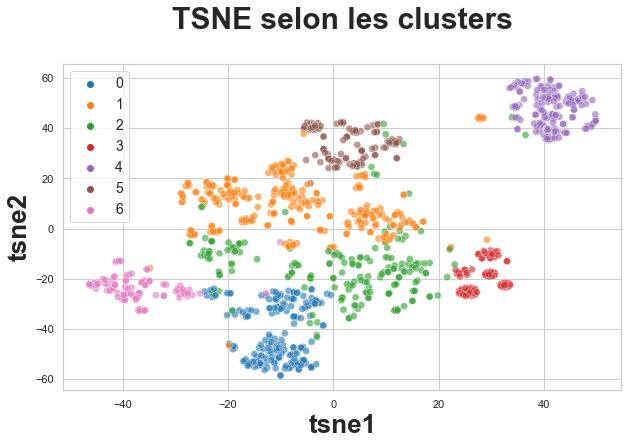

In [267]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [268]:
from sklearn.metrics import plot_confusion_matrix

cm = pd.crosstab(data["product_category_1"], cls.labels_)

cm

col_0                         0    1   2   3    4   5   6
product_category_1                                       
Baby Care                   103   20  11   1    0   0  15
Beauty and Personal Care      2  101  45   0    0   2   0
Computers                     0   50   3   0    0  97   0
Home Decor & Festive Needs    0   72  77   0    0   1   0
Home Furnishing              69    0   5   0    0   0  76
Kitchen & Dining              0   30  45  74    0   0   1
Watches                       0    6   3   0  141   0   0

In [269]:
from scipy.optimize import linear_sum_assignment as linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
js = sorted(indexes, key=lambda x: x[0])[1]
cm2 = cm[js]

cm = cm2

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


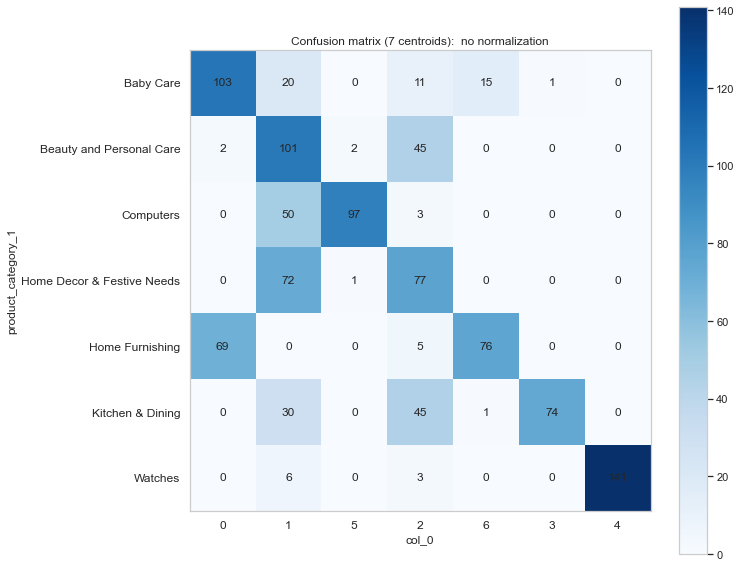

ARI :  0.3993391913274559


In [270]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap='Blues', normalize=False):
    
    # Adjust the size of the plot area ()
    plt.figure(figsize=(20, 20))

    # Show the plot
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, z, ha='center', va='center')

    # Give the plot a title and colorbar legend
    plt.title(title, size=12)
    plt.colorbar()

    # All thes stuff for the tick mark labels
    xtick_marks = np.arange(len(cm.columns))
    ytick_marks = np.arange(len(cm.index))
    plt.xticks(xtick_marks, cm.columns, size=12)
    plt.yticks(ytick_marks, cm.index, size=12)

    # Just the regular xlabel and ylabel for plot
    plt.ylabel(cm.index.name, size=12)
    plt.xlabel(cm.columns.name, size=12)

    # Setting to offset the labels with some space so they show up
    plt.subplots_adjust(left = 0.5, bottom=0.5)
    
#     plt.grid(which='major', color='w', linestyle='-', linewidth=0)
#     plt.grid(which='minor', color='red', linestyle='-', linewidth=2)
    
    plt.grid(axis = 'x', color='w', linestyle='-', linewidth=0)
    plt.grid(axis = 'y', color='w', linestyle='-', linewidth=0)


# Plot the confusion matrix DataFrame

plot_confusion_matrix(cm,  title='Confusion matrix (%d centroids):  no normalization' % len(cm.columns))

plt.show()

print("ARI : ", metrics.adjusted_rand_score(data["cluster"], data["product_category_1"]))

## Universal Sentence Encoder (product title only)

In [271]:
message_embeddings = embed(data["product_name"].values)

In [272]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", message_embeddings.shape)
pca = decomposition.PCA(n_components=0.99)
message_embeddings_pca= pca.fit_transform(message_embeddings)
print("Dimensions dataset après réduction PCA : ", message_embeddings_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 512)
Dimensions dataset après réduction PCA :  (1050, 301)


In [273]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(message_embeddings_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])

print(df_tsne.shape)

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(1050, 2)


In [274]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(message_embeddings_pca)

df_tsne["cluster"] = cls.labels_

data["cluster"] = cls.labels_

print(df_tsne.shape)

(1050, 3)


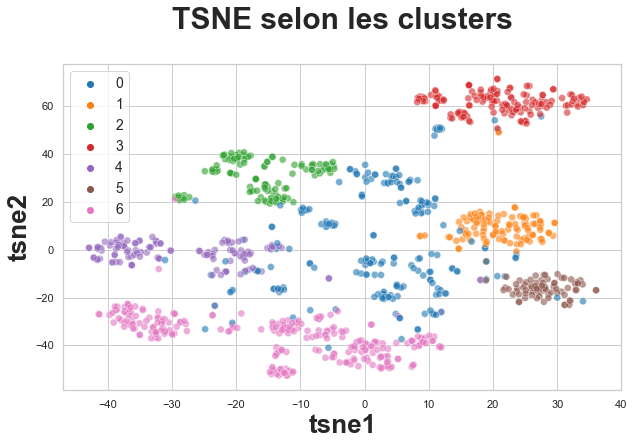

In [275]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [276]:
from sklearn.metrics import plot_confusion_matrix

cm = pd.crosstab(data["product_category_1"], cls.labels_)

cm

col_0                        0    1    2    3    4   5    6
product_category_1                                         
Baby Care                   29    0    0    0    4   1  116
Beauty and Personal Care    31    0    0    0  116   0    3
Computers                   30    0  119    0    0   0    1
Home Decor & Festive Needs  38  104    0    0    2   3    3
Home Furnishing              6    3    0    0    0   0  141
Kitchen & Dining            72    2    0    0    2  74    0
Watches                      6    0    0  144    0   0    0

In [277]:
from scipy.optimize import linear_sum_assignment as linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = linear_assignment(_make_cost_m(cm))
js = sorted(indexes, key=lambda x: x[0])[1]
cm2 = cm[js]

cm = cm2

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


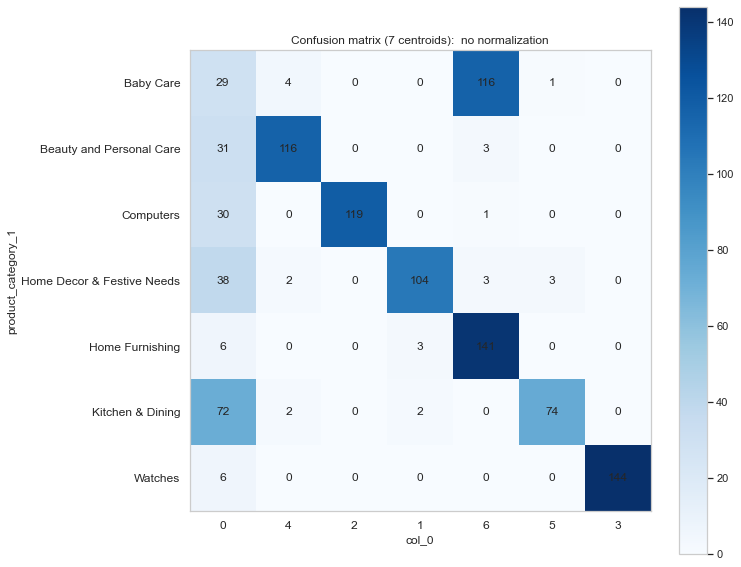

ARI :  0.5622213284076578


In [278]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap='Blues', normalize=False):
    
    # Adjust the size of the plot area ()
    plt.figure(figsize=(20, 20))

    # Show the plot
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, z, ha='center', va='center')

    # Give the plot a title and colorbar legend
    plt.title(title, size=12)
    plt.colorbar()

    # All thes stuff for the tick mark labels
    xtick_marks = np.arange(len(cm.columns))
    ytick_marks = np.arange(len(cm.index))
    plt.xticks(xtick_marks, cm.columns, size=12)
    plt.yticks(ytick_marks, cm.index, size=12)

    # Just the regular xlabel and ylabel for plot
    plt.ylabel(cm.index.name, size=12)
    plt.xlabel(cm.columns.name, size=12)

    # Setting to offset the labels with some space so they show up
    plt.subplots_adjust(left = 0.5, bottom=0.5)
    
#     plt.grid(which='major', color='w', linestyle='-', linewidth=0)
#     plt.grid(which='minor', color='red', linestyle='-', linewidth=2)
    
    plt.grid(axis = 'x', color='w', linestyle='-', linewidth=0)
    plt.grid(axis = 'y', color='w', linestyle='-', linewidth=0)


# Plot the confusion matrix DataFrame

plot_confusion_matrix(cm,  title='Confusion matrix (%d centroids):  no normalization' % len(cm.columns))

plt.show()

print("ARI : ", metrics.adjusted_rand_score(data["cluster"], data["product_category_1"]))

# Traitement des images

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from os import listdir

path = 'C:/Users/guial/Documents/OPEN_CLASSROOM/Projets_Data_Scientist/P6_Allemoniere_Guillaume/Images/'

In [280]:
from sklearn import preprocessing

data = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')
data["product_category_1"] = data["product_category_tree"].apply(lambda char : char.split('[')[1].split('"')[1].split(" >> ")[0])
data_Image = pd.DataFrame()
data_Image["image"] = data["image"]
data_Image["label_Name"] = data["product_category_1"]
le = preprocessing.LabelEncoder()
data_Image["label"] = le.fit_transform(data["product_category_1"])
data_Image

image       label_Name  label
0     55b85ea15a1536d46b7190ad6fff8ce7.jpg  Home Furnishing      4
1     7b72c92c2f6c40268628ec5f14c6d590.jpg        Baby Care      0
2     64d5d4a258243731dc7bbb1eef49ad74.jpg        Baby Care      0
3     d4684dcdc759dd9cdf41504698d737d8.jpg  Home Furnishing      4
4     6325b6870c54cd47be6ebfbffa620ec7.jpg  Home Furnishing      4
...                                    ...              ...    ...
1045  958f54f4c46b53c8a0a9b8167d9140bc.jpg        Baby Care      0
1046  fd6cbcc22efb6b761bd564c28928483c.jpg        Baby Care      0
1047  5912e037d12774bb73a2048f35a00009.jpg        Baby Care      0
1048  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg        Baby Care      0
1049  f2f027ad6a6df617c9f125173da71e44.jpg        Baby Care      0

[1050 rows x 3 columns]

In [281]:
data_Image.groupby("label_Name", as_index=False).agg({'label':'mean'})

label_Name  label
0                   Baby Care    0.0
1    Beauty and Personal Care    1.0
2                   Computers    2.0
3  Home Decor & Festive Needs    3.0
4             Home Furnishing    4.0
5            Kitchen & Dining    5.0
6                     Watches    6.0

In [282]:
list_labels = ["Baby Care", "Beauty and Personal Care", "Computers", "Home Decor & Festive Needs", "Home Furnishing", "Kitchen & Dining", "Watches"]

## Affichage d'exemples d'images par label

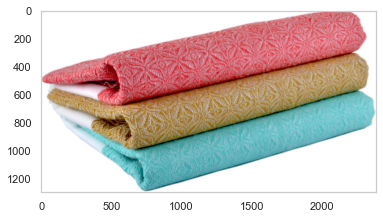

In [284]:
from matplotlib.image import imread

image = imread(path+data_Image.loc[1,"image"])

plt.grid(axis = 'x', color='w', linestyle='-', linewidth=0)
plt.grid(axis = 'y', color='w', linestyle='-', linewidth=0)
plt.imshow(image)

## SIFT

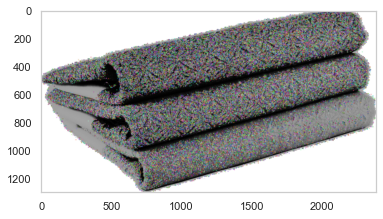

Descripteurs :  (47651, 128)

[[ 85. 113.  31. ...   0.   0.   0.]
 [ 29.  80.  73. ...   0.   0.   0.]
 [ 10.  67. 115. ...   0.   0.  22.]
 ...
 [  0.   0.   0. ...   0.   0.  13.]
 [ 40.   0.   0. ...   0.   0.  51.]
 [ 37.   1.   0. ...   0.   0.   0.]]


In [285]:
import cv2

sift = cv2.xfeatures2d.SIFT_create()
image = cv2.imread(path+data_Image.loc[1,"image"],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.grid(axis = 'x', color='w', linestyle='-', linewidth=0)
plt.grid(axis = 'y', color='w', linestyle='-', linewidth=0)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

In [286]:
# identification of key points and associated descriptors
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create(500)

for image_num in range(len(data_Image)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+data_Image.loc[image_num,"image"],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000


C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app



Nombre de descripteurs :  (517309, 128)
temps de traitement SIFT descriptor :           316.38 secondes


In [287]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  719
Création de 719 clusters de descripteurs ...
temps de traitement kmeans :            11.45 secondes


In [288]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             5.42 secondes


In [289]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 719)
Dimensions dataset après réduction PCA :  (1050, 498)


In [290]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data_Image["label_Name"]
print(df_tsne.shape)

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(1050, 3)


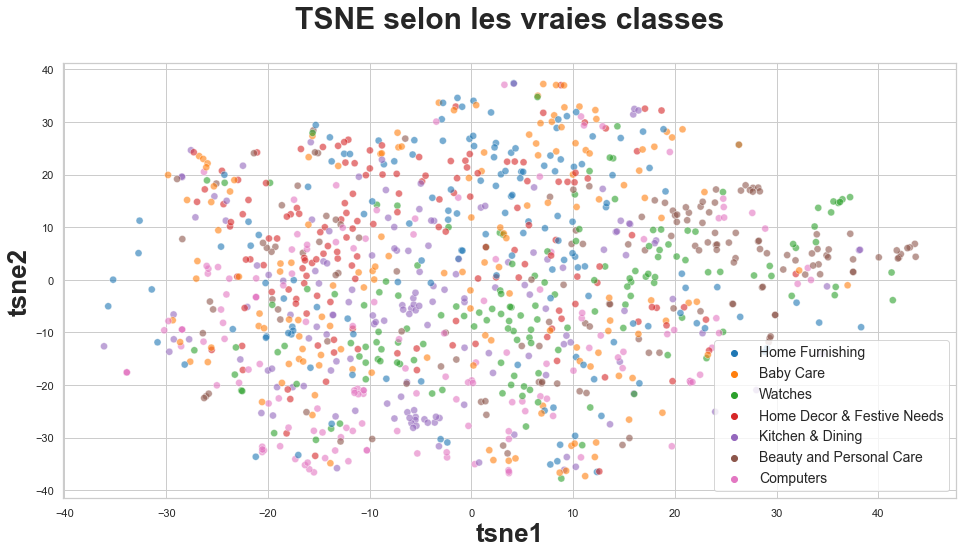

In [291]:
plt.figure(figsize=(16,8))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [292]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


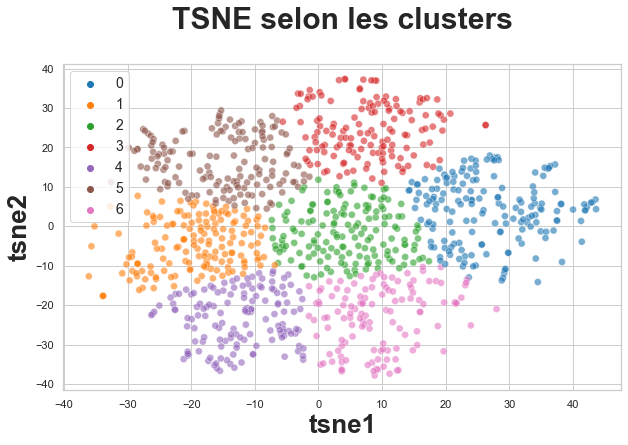

In [300]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [294]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    171
1    158
2    161
3    142
4    140
5    150
6    128
Name: class, dtype: int64

In [295]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[ 8 26 17 39 14 22 24]
 [77 15 13  4  8 15 18]
 [14 29  9  8 44 13 33]
 [ 7 29 22 26 11 50  5]
 [12 21 23 50  9 21 14]
 [14 26 31  8 31 23 17]
 [39 12 46  7 23  6 17]]


In [296]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # corresp = np.argmax(conf_mat, axis=0)
    corresp = [6, 5, 4, 3, 1, 2, 0]
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [6, 5, 4, 3, 1, 2, 0]
[[24 14 22 39 17 26  8]
 [18  8 15  4 13 15 77]
 [33 44 13  8  9 29 14]
 [ 5 11 50 26 22 29  7]
 [14  9 21 50 23 21 12]
 [17 31 23  8 31 26 14]
 [17 23  6  7 46 12 39]]

              precision    recall  f1-score   support

           0       0.19      0.16      0.17       150
           1       0.06      0.05      0.06       150
           2       0.09      0.09      0.09       150
           3       0.18      0.17      0.18       150
           4       0.14      0.15      0.15       150
           5       0.16      0.17      0.17       150
           6       0.23      0.26      0.24       150

    accuracy                           0.15      1050
   macro avg       0.15      0.15      0.15      1050
weighted avg       0.15      0.15      0.15      1050



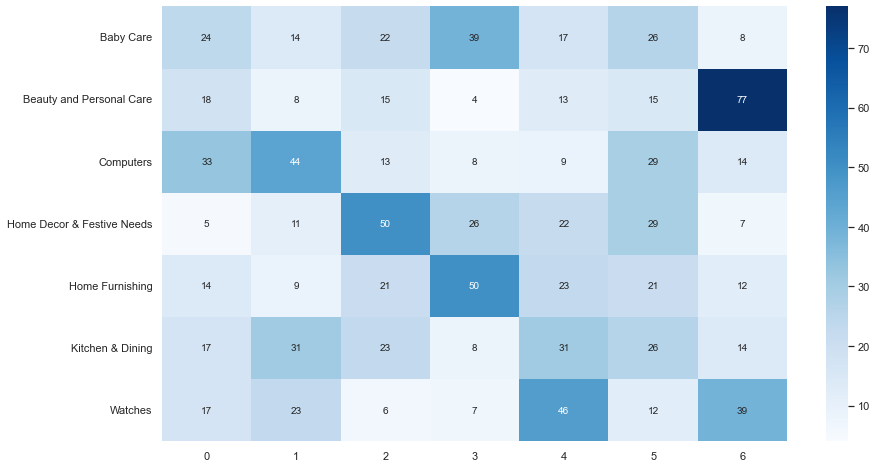

ARI :  0.06733454089687134


In [299]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (14,8))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.show()
labels = data_Image["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

## ORB

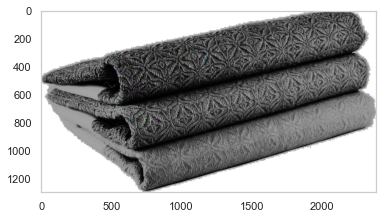

Descripteurs :  (500, 32)

[[ 52  63  62 ...  35 166  51]
 [219 207  42 ... 148 184  90]
 [182 231 107 ... 144 246 225]
 ...
 [229 204 210 ... 125 232 142]
 [ 45 108  88 ... 251  72 208]
 [ 75  58 242 ... 133  21 127]]


In [301]:
import cv2

orb = cv2.ORB_create()
image = cv2.imread(path+data_Image.loc[1,"image"],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = orb.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.grid(axis = 'x', color='w', linestyle='-', linewidth=0)
plt.grid(axis = 'y', color='w', linestyle='-', linewidth=0)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

In [302]:
# identification of key points and associated descriptors
import time, cv2
orb_keypoints = []
temps1=time.time()
orb = cv2.ORB_create(500)

for image_num in range(len(data_Image)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+data_Image.loc[image_num,"image"],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = orb.detectAndCompute(res, None)
    orb_keypoints.append(des)

orb_keypoints_by_img = np.asarray(orb_keypoints)
orb_keypoints_all    = np.concatenate(orb_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", orb_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement ORB descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (520153, 32)
temps de traitement ORB descriptor :            38.20 secondes


C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


In [303]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(orb_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(orb_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  721
Création de 721 clusters de descripteurs ...
temps de traitement kmeans :             9.48 secondes


In [304]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(orb_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             5.60 secondes


In [305]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 721)
Dimensions dataset après réduction PCA :  (1050, 576)


In [306]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data_Image["label_Name"]
print(df_tsne.shape)

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(1050, 3)


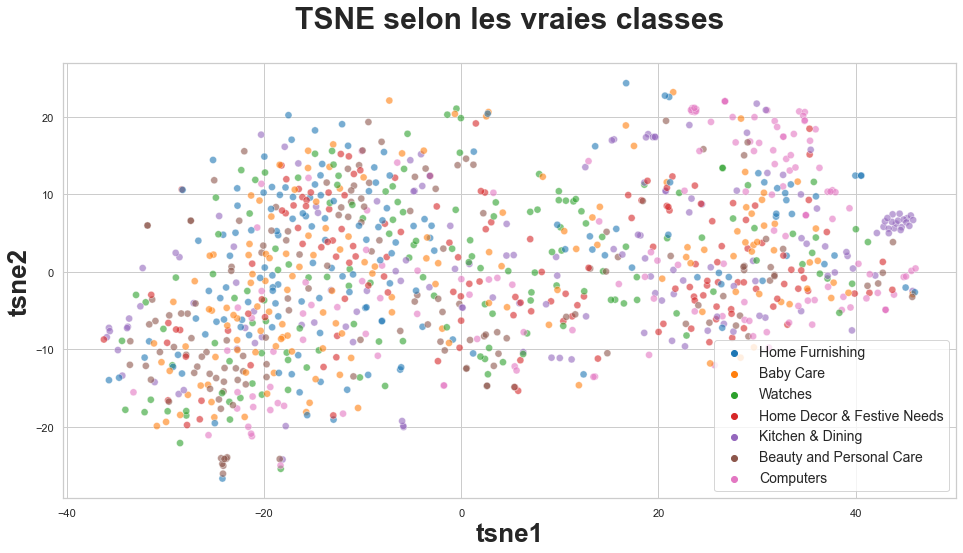

In [307]:
plt.figure(figsize=(16,8))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [308]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


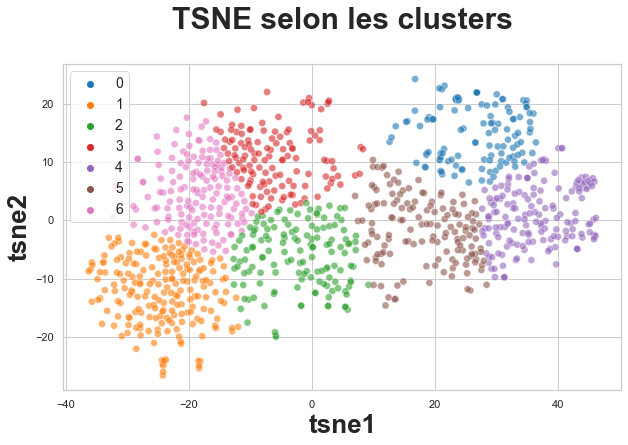

In [314]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [310]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    117
1    206
2    141
3    127
4    163
5    142
6    154
Name: class, dtype: int64

In [311]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[11 41 17 14 22 16 29]
 [ 5 46 23 26 16 13 21]
 [44 20 19  5 40 15  7]
 [16 17 21 18 22 32 24]
 [11 29 14 27 13 14 42]
 [23 22 21  9 38 25 12]
 [ 7 31 26 28 12 27 19]]


In [312]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # corresp = np.argmax(conf_mat, axis=0)
    corresp = [6, 5, 4, 3, 1, 2, 0]
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [6, 5, 4, 3, 1, 2, 0]
[[29 22 16 14 17 41 11]
 [21 16 13 26 23 46  5]
 [ 7 40 15  5 19 20 44]
 [24 22 32 18 21 17 16]
 [42 13 14 27 14 29 11]
 [12 38 25  9 21 22 23]
 [19 12 27 28 26 31  7]]

              precision    recall  f1-score   support

           0       0.19      0.19      0.19       150
           1       0.10      0.11      0.10       150
           2       0.11      0.10      0.10       150
           3       0.14      0.12      0.13       150
           4       0.10      0.09      0.10       150
           5       0.11      0.15      0.12       150
           6       0.06      0.05      0.05       150

    accuracy                           0.12      1050
   macro avg       0.11      0.12      0.11      1050
weighted avg       0.11      0.12      0.11      1050



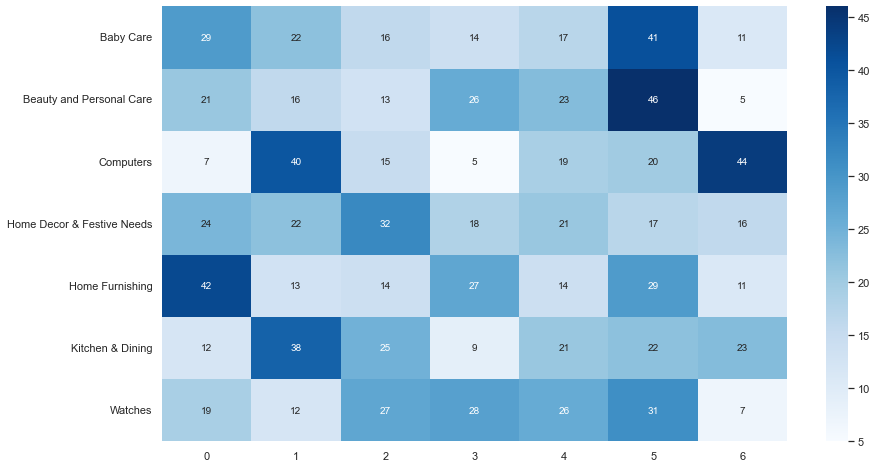

ARI :  0.02604751395100981


In [313]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (14,8))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.show()
labels = data_Image["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

# VGG-16

In [342]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [343]:
path = 'C:/Users/guial/Documents/OPEN_CLASSROOM/Projets_Data_Scientist/P6_Allemoniere_Guillaume/Images/'

In [344]:
from sklearn import preprocessing

data = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')
data["product_category_1"] = data["product_category_tree"].apply(lambda char : char.split('[')[1].split('"')[1].split(" >> ")[0])
data_Image = pd.DataFrame()
data_Image["image"] = data["image"]
data_Image["label_Name"] = data["product_category_1"]
le = preprocessing.LabelEncoder()
data_Image["label"] = le.fit_transform(data["product_category_1"])
data_Image

image       label_Name  label
0     55b85ea15a1536d46b7190ad6fff8ce7.jpg  Home Furnishing      4
1     7b72c92c2f6c40268628ec5f14c6d590.jpg        Baby Care      0
2     64d5d4a258243731dc7bbb1eef49ad74.jpg        Baby Care      0
3     d4684dcdc759dd9cdf41504698d737d8.jpg  Home Furnishing      4
4     6325b6870c54cd47be6ebfbffa620ec7.jpg  Home Furnishing      4
...                                    ...              ...    ...
1045  958f54f4c46b53c8a0a9b8167d9140bc.jpg        Baby Care      0
1046  fd6cbcc22efb6b761bd564c28928483c.jpg        Baby Care      0
1047  5912e037d12774bb73a2048f35a00009.jpg        Baby Care      0
1048  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg        Baby Care      0
1049  f2f027ad6a6df617c9f125173da71e44.jpg        Baby Care      0

[1050 rows x 3 columns]

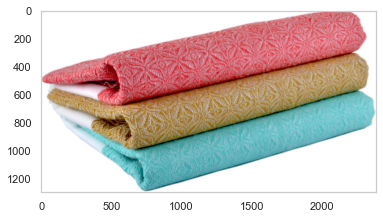

In [345]:
from matplotlib.image import imread

image = imread(path+data_Image.loc[1,"image"])
plt.grid(axis = 'x', color='w', linestyle='-', linewidth=0)
plt.grid(axis = 'y', color='w', linestyle='-', linewidth=0)
plt.imshow(image)

In [346]:
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

In [347]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [348]:
Images_Vector = {}

In [349]:
# lop through each image in the dataset
for image in data_Image['image']:
#     print(path+image)
    feat = extract_features(path+image,model)
    Images_Vector[image] = feat

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\PIL\Image.py:2921: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [350]:
feat = np.array(list(Images_Vector.values()))

In [351]:
feat

array([[[3.4062772 , 0.8570423 , 0.        , ..., 0.        ,
         0.8658619 , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 1.3071451 ,
         0.        , 0.        ]],

       ...,

       [[2.193173  , 2.3964322 , 2.6302476 , ..., 2.1707253 ,
         0.1852143 , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.22905265, 0.92209196]],

       [[0.        , 0.        , 0.12173516, ..., 0.        ,
         0.54226947, 2.9691808 ]]], dtype=float32)

In [352]:
feat = feat.reshape(-1,4096)
feat

array([[3.4062772 , 0.8570423 , 0.        , ..., 0.        , 0.8658619 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.3071451 , 0.        ,
        0.        ],
       ...,
       [2.193173  , 2.3964322 , 2.6302476 , ..., 2.1707253 , 0.1852143 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.22905265,
        0.92209196],
       [0.        , 0.        , 0.12173516, ..., 0.        , 0.54226947,
        2.9691808 ]], dtype=float32)

In [353]:
pca = PCA(n_components=0.99, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [354]:
print("Dimensions dataset avant réduction PCA : ", feat.shape)
print("Dimensions dataset avant réduction PCA : ", x.shape)

Dimensions dataset avant réduction PCA :  (1050, 4096)
Dimensions dataset avant réduction PCA :  (1050, 803)


In [355]:
kmeans = KMeans(n_clusters=7, random_state=22)
kmeans.fit(x)

KMeans(n_clusters=7, random_state=22)

In [356]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(x)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["y"] = kmeans.labels_
print(df_tsne.shape)

C:\Users\guial\anaconda3\envs\myCoolProject\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(1050, 3)


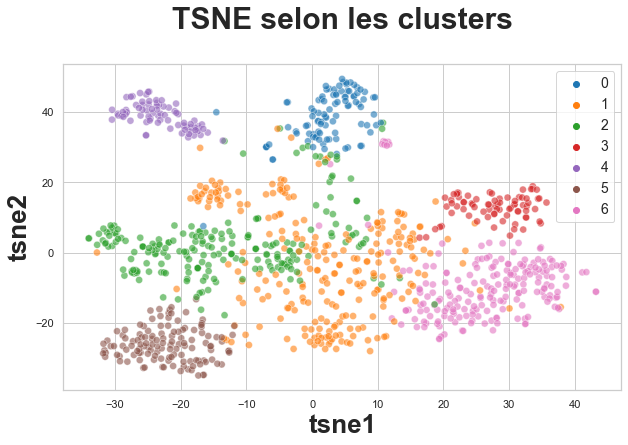

In [357]:
import seaborn as sns
from sklearn import metrics
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="y",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data_Image["label"]

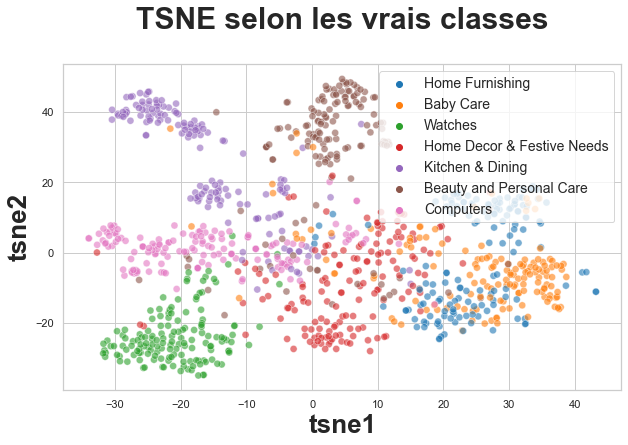

In [358]:
df_tsne["class"] = data_Image["label_Name"]
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les vrais classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [359]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[11 41 17 14 22 16 29]
 [ 5 46 23 26 16 13 21]
 [44 20 19  5 40 15  7]
 [16 17 21 18 22 32 24]
 [11 29 14 27 13 14 42]
 [23 22 21  9 38 25 12]
 [ 7 31 26 28 12 27 19]]


In [360]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # corresp = np.argmax(conf_mat, axis=0)
    corresp = [6, 5, 4, 3, 1, 2, 0]
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [6, 5, 4, 3, 1, 2, 0]
[[29 22 16 14 17 41 11]
 [21 16 13 26 23 46  5]
 [ 7 40 15  5 19 20 44]
 [24 22 32 18 21 17 16]
 [42 13 14 27 14 29 11]
 [12 38 25  9 21 22 23]
 [19 12 27 28 26 31  7]]

              precision    recall  f1-score   support

           0       0.19      0.19      0.19       150
           1       0.10      0.11      0.10       150
           2       0.11      0.10      0.10       150
           3       0.14      0.12      0.13       150
           4       0.10      0.09      0.10       150
           5       0.11      0.15      0.12       150
           6       0.06      0.05      0.05       150

    accuracy                           0.12      1050
   macro avg       0.11      0.12      0.11      1050
weighted avg       0.11      0.12      0.11      1050



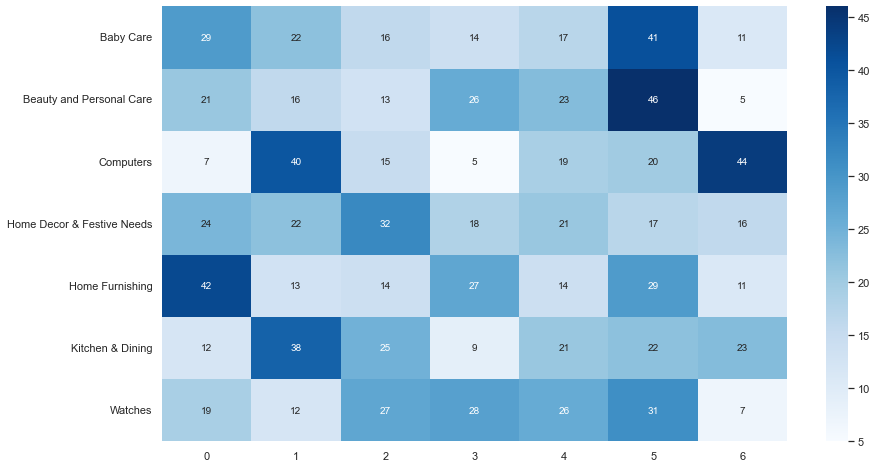

ARI :  0.47598704111677476


In [361]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (14,8))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.show()

labels = data["product_category_1"]
print("ARI : ", metrics.adjusted_rand_score(labels, kmeans.labels_))